# Main Title: Maximising Rental Profits : Insights from the Kuala Lumpur Property Market 

**Team Members**: 
- Keshav Thinakaran (36034789)
- Joyceline Oleta Lee (35237635)
- Natalie Saw (35209518)
- Chuah Yi Ching (34474730)
- Lim Kee Yang (35677279)
- Liu Xiongyasong (34802665)

**Progress**
 1. 1st May - Questions selection (All)
 2. 2nd May - Data plotting (All)
 3. 9th May - Code clean up (All)
 4. 11th May - Data analysis (All)
 5. 17th May - Tidying up analysis/documentation file (All)
 6. 18th May - Adding figure captions and combining analysis into unified theme (All)




## Background Information

**Client Profile:**
- A major developer, or Real Estate Investment Trust (REIT) that intends to purchase housing stock for the purpose of generating revenue

**Main Research Question:**
- What are the factors driving changes in rental yields in residential property in Malaysia?

**Research Hypothesis**

We believe that there are two main revenue sources for generating revenue from housing. 

**Two main revenue sources for housing:**
- Proceeds from rental 
- Proceeds from sale of property after property experiences capital appreciation

Proceeds from rentals provide long-term income for our investor. Rental incomes are also the main determinant of the extent of capital appreciation that our property can experience. Therefore, it is of paramount importance that our investor chooses housing that maintain consistent rental yields over an extended period of time, and generate a fair rental yield (proceeds from rental) that is appealing to future buyers if/when our investor decides to sell the house.

The main research question will guide our investor to purchase the houses that generate the highest return on investment for the business. However, it is a straightforward question without a straightforward answer. Below is a summary of the data points of interest:

**Data points of interest:**
- Rental Yield per Square Feet
- Area that Property is Located
- Property Type
- Furnishing Status
- Types of facilities included


**How does our analysis serve the client?** <br>
In order to locate housing stock preferred by renters, we analyse several factors such as the location, property type, furnishing status, and types of facilities that renters prefer.

The goal is to locate housing stock that generates the highest return on investment



**Import Statements**

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabulate import tabulate
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.gridspec as gridspec

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings('ignore')

df = pd.read_csv('malaysia_house_rental_price_data.csv')

**Code and Analysis**

## Question: Is this a good time to purchase housing stock with an expectation of capital appreciation in the future?

**Name:** Kee Yang / Liu Xiongyasong <br>
**Variables used:** completion_year, count <br>
**Graphs used:** Line graph <br>



Figure 1.1: Number of properties completed by year

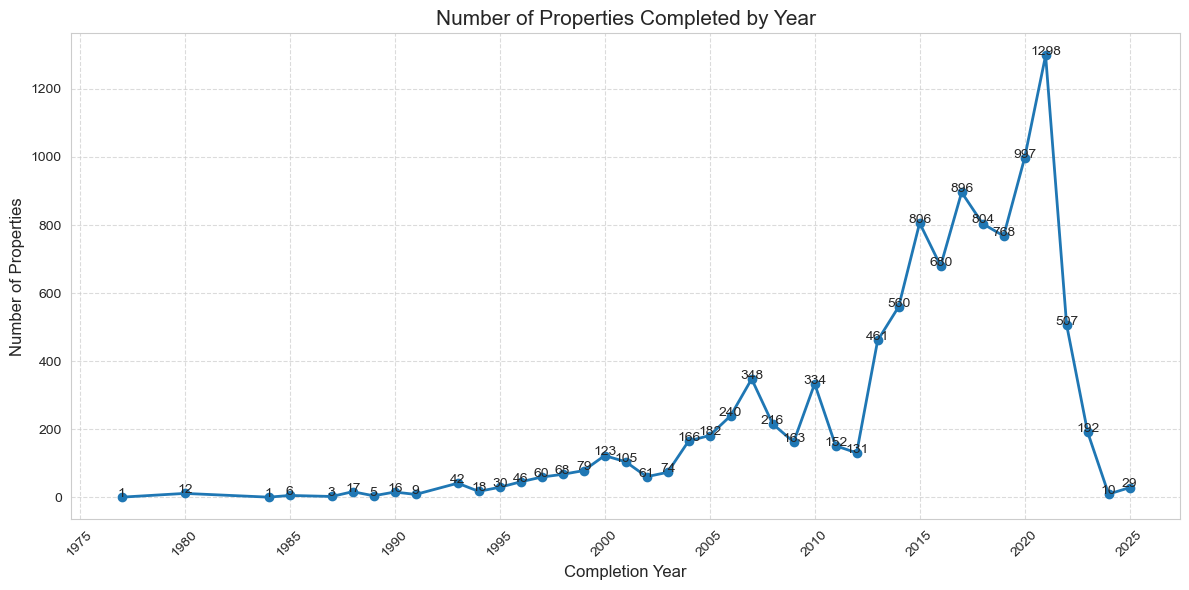

In [121]:
# Group by completion_year and count the number of properties
property_counts = df.groupby('completion_year').size().reset_index(name='count')

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(property_counts['completion_year'], property_counts['count'], marker='o', linewidth=2)

# Add labels and title
plt.title('Number of Properties Completed by Year', fontsize=15)
plt.xlabel('Completion Year', fontsize=12)
plt.ylabel('Number of Properties', fontsize=12)

# Set x-axis ticks every 5 years
min_year = property_counts['completion_year'].min()
max_year = property_counts['completion_year'].max()
start_year = min_year - (min_year % 5)
end_year = max_year + (5 - max_year % 5) if max_year % 5 else max_year
five_year_ticks = np.arange(start_year, end_year + 1, 5)
plt.xticks(five_year_ticks, rotation=45)

# Enhance the grid
plt.grid(True, linestyle='--', alpha=0.7)

# Add data points values
for x, y in zip(property_counts['completion_year'], property_counts['count']):
    plt.text(x, y+0.5, str(y), ha='center')

plt.tight_layout()
plt.show()

Figure 1.2: Number of properties completed by 5-year intervals

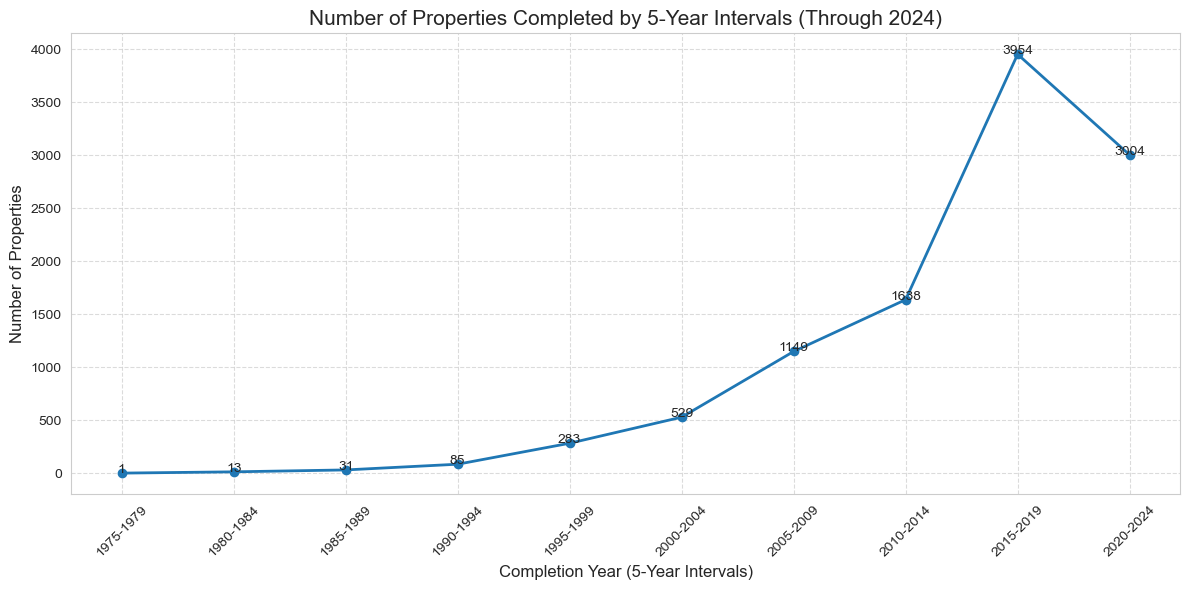

In [123]:
# Filter out data from 2025 onwards (incomplete bin)
df_filtered = df[df['completion_year'] <= 2024].copy()


# Create a column for 5-year bins (2000, 2005, 2010, etc.)
df_filtered['five_year_bin'] = df_filtered['completion_year'] - (df_filtered['completion_year'] % 5)
df_filtered['five_year_bin'] = df_filtered['five_year_bin'].astype(int)

# Group by these 5-year bins and count properties
property_counts = df_filtered.groupby('five_year_bin').size().reset_index(name='count')

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(property_counts['five_year_bin'], property_counts['count'], marker='o', linewidth=2)

# Add labels and title
plt.title('Number of Properties Completed by 5-Year Intervals (Through 2024)', fontsize=15)
plt.xlabel('Completion Year (5-Year Intervals)', fontsize=12)
plt.ylabel('Number of Properties', fontsize=12)

# Create x-axis labels showing the 5-year range (e.g., "2000-2004")
x_labels = [f"{year}-{year+4}" for year in property_counts['five_year_bin']]
plt.xticks(property_counts['five_year_bin'], x_labels, rotation=45)

# Enhance the grid
plt.grid(True, linestyle='--', alpha=0.7)

# Add data point values
for x, y in zip(property_counts['five_year_bin'], property_counts['count']):
    plt.text(x, y+0.5, str(y), ha='center')

plt.tight_layout()
plt.show()



## Data Analysis:

- Figure 1.1 is used for year by year comparison of number of completed homes <br>
- According to Figure 1.1, the number of properties completed every year has been growing exponentially, reaching a peak in 2021 with 1298 houses completed. This is followed by a steep drop in the following years. <br>
- Houses completed in 2025 have been filtered out for Completion Year (5 Year Intervals) in Figure 1.2 as data in completion intervals 2025-2029 is not complete. Year 2025, and the year 2026 and so on are in the future. <br>
- Grouping the number of properties completed in 5 year intervals in Figure 1.2 shows a more accurate reflection of the health of the Malaysian property market <br>
- According to Figure 1.2, there has been steady growth in the number of properties completed for every 5 year interval with the exception of the 2020-2024 interval. The drop is likely caused by construction delays due to lockdowns that resulted from the COVID-19 pandemic, and does not reflect systemic weaknesses in the Malaysian property market, or the economy in general. <br>

## Conclusion:
Based on the current trends observed, which shows consistent growth in the number of homes completed, we believe that capital appreciation of homes is likely due to the excellent health of the Malaysian property market. Continued growth shows that buyers have confidence in the continued strength and resilience of housing as a safe investment and store of value.







## Question: How does the number of rooms in a property affect the median monthly rent in Malaysia? What layouts are being built by developers? What layouts do tenants prefer?

**Name:** Kee Yang / Natalie Saw <br>
**Variables:**  area, rooms <br>
**Graphs used:** Bar chart <br>


Figure 2.1: Median monthly rent per square foot by number of rooms

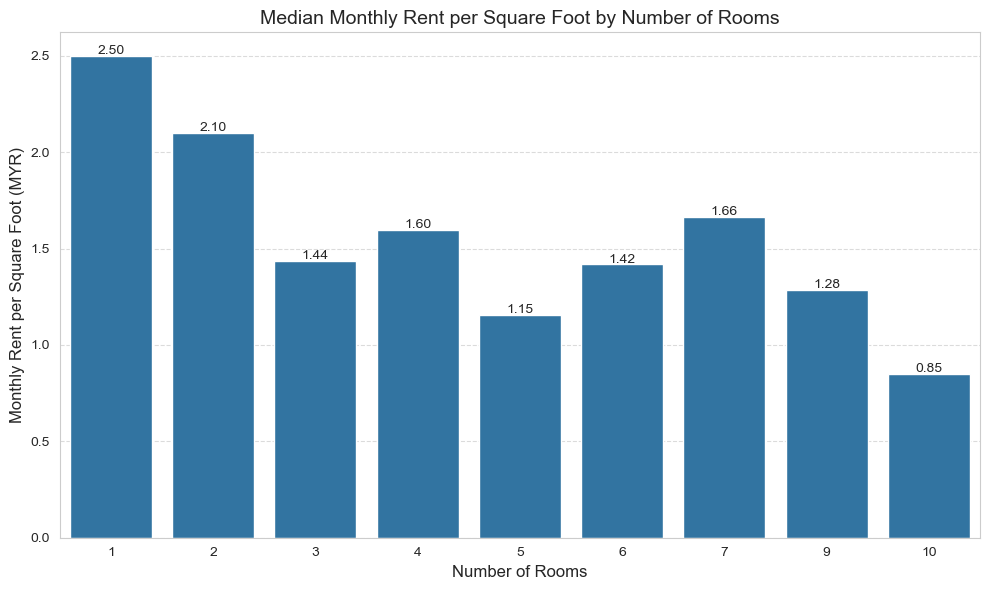

In [127]:
# Calculate monthly rent per square foot
df['monthly_rent_per_sqft'] = df['monthly_rent'] / df['size']

# Group by number of rooms and calculate mean rent per square foot
rooms_vs_rent = df.groupby('rooms')['monthly_rent_per_sqft'].median().reset_index()
rooms_vs_rent['rooms'] = rooms_vs_rent['rooms'].astype(int)
# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='rooms', y='monthly_rent_per_sqft', data=rooms_vs_rent)

# Add title and labels
plt.title('Median Monthly Rent per Square Foot by Number of Rooms', fontsize=14)
plt.xlabel('Number of Rooms', fontsize=12)
plt.ylabel('Monthly Rent per Square Foot (MYR)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for i, v in enumerate(rooms_vs_rent['monthly_rent_per_sqft']):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

Figure 2.2: Market share of various room sizes

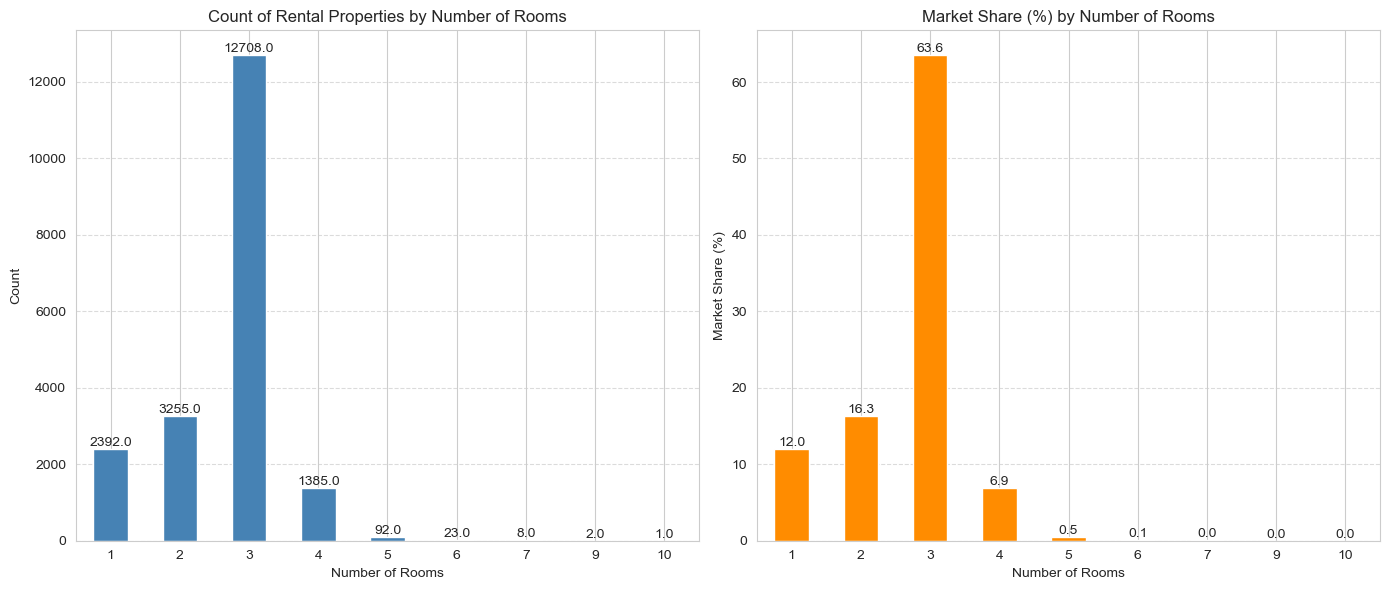

In [129]:
room_counts = df['rooms'].value_counts().sort_index()
room_counts.index = room_counts.index.astype(int)
market_share = (room_counts / len(df) * 100).round(2)
# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
# Create the count bar chart
room_counts.plot(kind='bar', ax=ax1, color='steelblue')
ax1.set_title('Count of Rental Properties by Number of Rooms', fontsize=12)
ax1.set_xlabel('Number of Rooms')
ax1.set_ylabel('Count')
ax1.grid(axis='y', linestyle='--', alpha=0.7)
# Create the market share bar chart
market_share.plot(kind='bar', ax=ax2, color='darkorange')
ax2.set_title('Market Share (%) by Number of Rooms', fontsize=12)
ax2.set_xlabel('Number of Rooms')
ax2.set_ylabel('Market Share (%)')
ax2.grid(axis='y', linestyle='--', alpha=0.7)
# Improve formatting
for ax in [ax1, ax2]:
    # Add data labels on top of each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f', fontsize=10)
    # Rotate x-axis labels to vertical
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.savefig('malaysia_rental_room_analysis.png', dpi=300)
plt.show()


Figure 2.3: Average house size by number of rooms

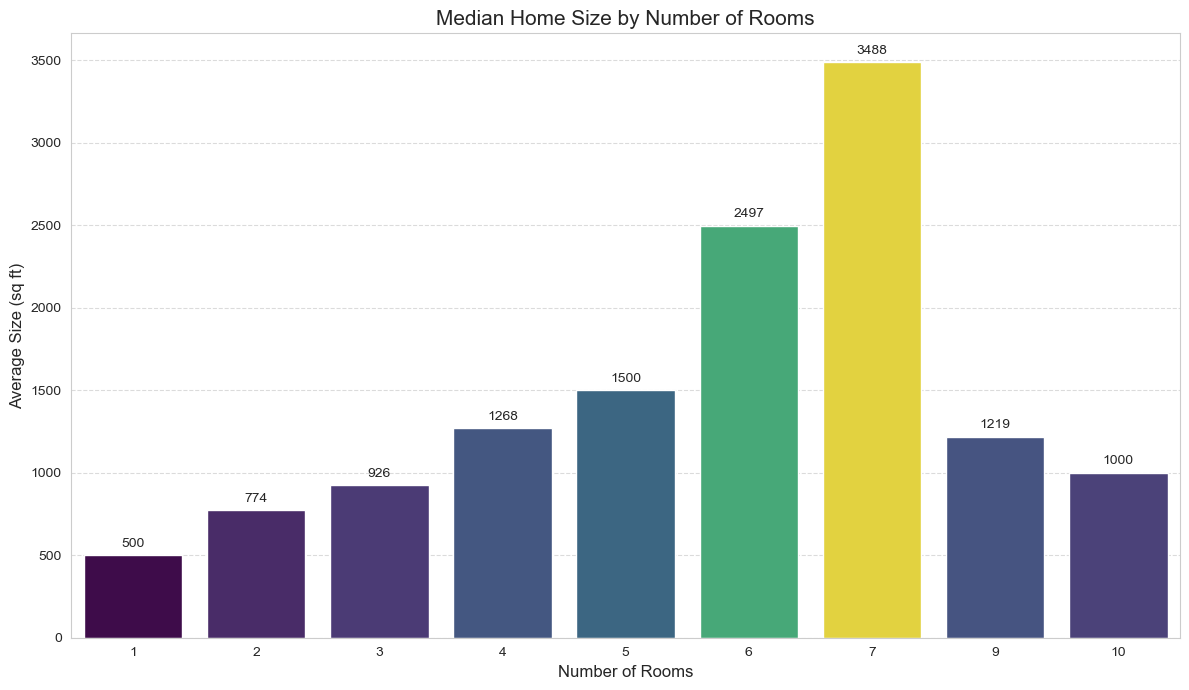

In [131]:
# Filter out room sizes above 50000
df_filtered = df[df['size'] <= 50000]

# Group by number of rooms and calculate average size
avg_size_by_rooms = df_filtered.groupby('rooms')['size'].median().reset_index()
avg_size_by_rooms['rooms'] = avg_size_by_rooms['rooms'].astype(int)
# Create the bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x='rooms', y='size', data=avg_size_by_rooms,hue="size", palette='viridis', legend=False)

# Add title and labels
plt.title('Median Home Size by Number of Rooms', fontsize=15)
plt.xlabel('Number of Rooms', fontsize=12)
plt.ylabel('Average Size (sq ft)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on bars
for i, row in enumerate(avg_size_by_rooms.itertuples()):
    plt.text(i, row.size + 50, f'{row.size:.0f}', ha='center', fontsize=10)

# Improve the appearance
plt.tight_layout()


# Show the plot
plt.show()



Figure 2.4: Average room size by number of rooms

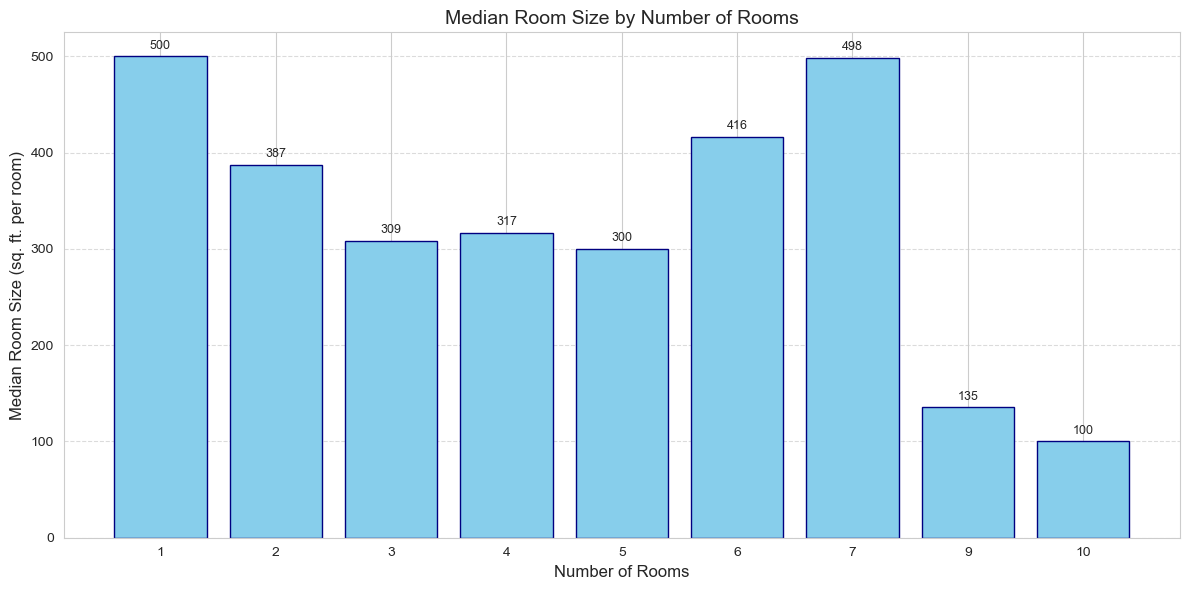

In [133]:
# Filter out houses with size above 40000 and remove rows with missing values
df_filtered = df[df['size'] <= 40000].copy()
df_filtered = df_filtered.dropna(subset=['size', 'rooms'])

# Convert 'rooms' to integer (important for plotting and grouping)
df_filtered['rooms'] = df_filtered['rooms'].astype(int)

# Calculate room size (size divided by number of rooms)
df_filtered['room_size'] = df_filtered['size'] / df_filtered['rooms']

# Group by number of rooms and calculate median room size
room_size_by_rooms = df_filtered.groupby('rooms')['room_size'].median().reset_index()

# Make sure rooms are sorted and only include rooms with data
room_size_by_rooms = room_size_by_rooms.sort_values('rooms')

# Create the bar chart with explicit x positions
plt.figure(figsize=(12, 6))
x_positions = range(len(room_size_by_rooms))  # Use sequential positions
bars = plt.bar(x_positions, room_size_by_rooms['room_size'], 
               color='skyblue', edgecolor='navy')

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height:.0f}', ha='center', va='bottom', fontsize=9)

# Set x-ticks to use the actual room numbers without gaps
plt.xticks(x_positions, room_size_by_rooms['rooms'])

# Customize the chart
plt.title('Median Room Size by Number of Rooms', fontsize=14)
plt.xlabel('Number of Rooms', fontsize=12)
plt.ylabel('Median Room Size (sq. ft. per room)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve appearance
plt.tight_layout()

# Show the plot
plt.show()

# Print the summary table
#print("\nSummary of Median Room Size by Number of Rooms:")
#print(room_size_by_rooms.set_index('rooms').sort_index())


Figure 2.5: Top areas for houses with different room configurations

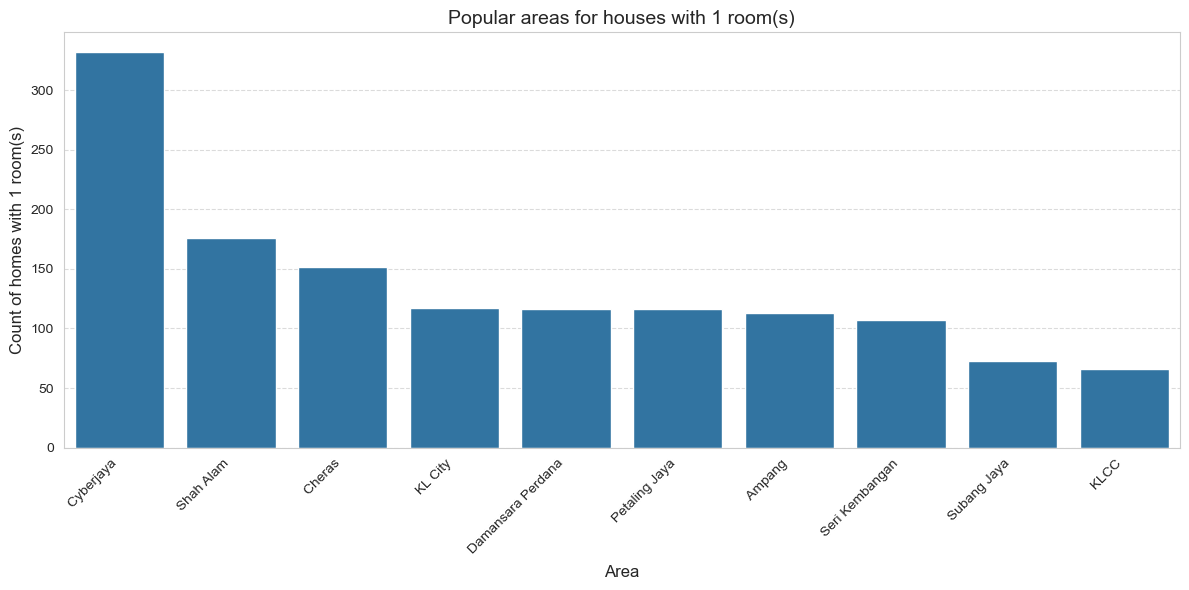

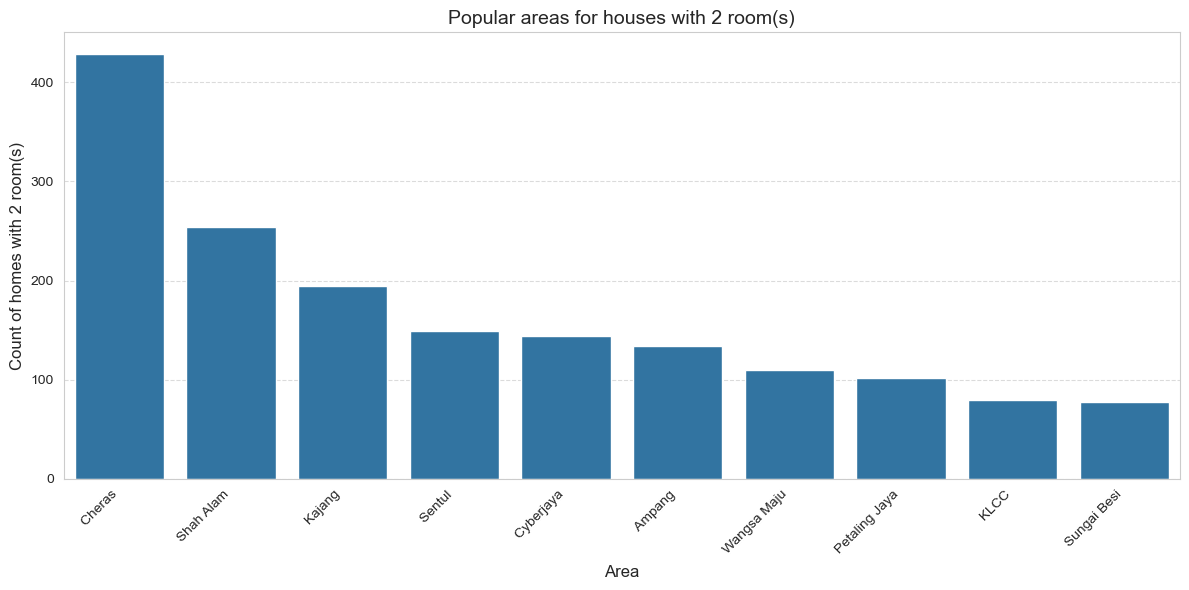

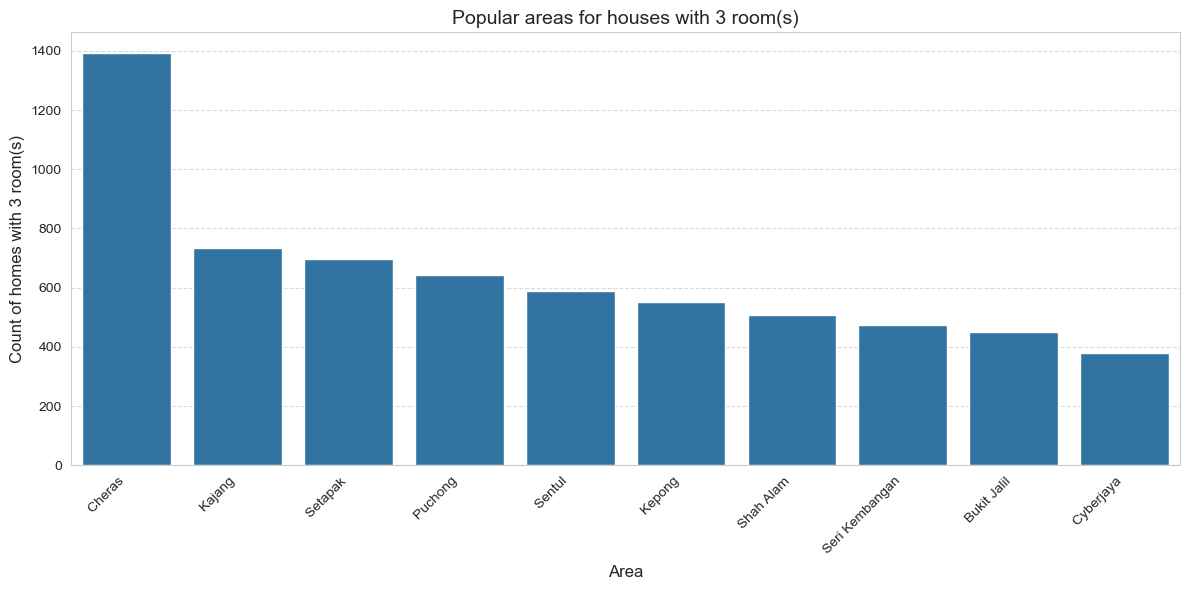

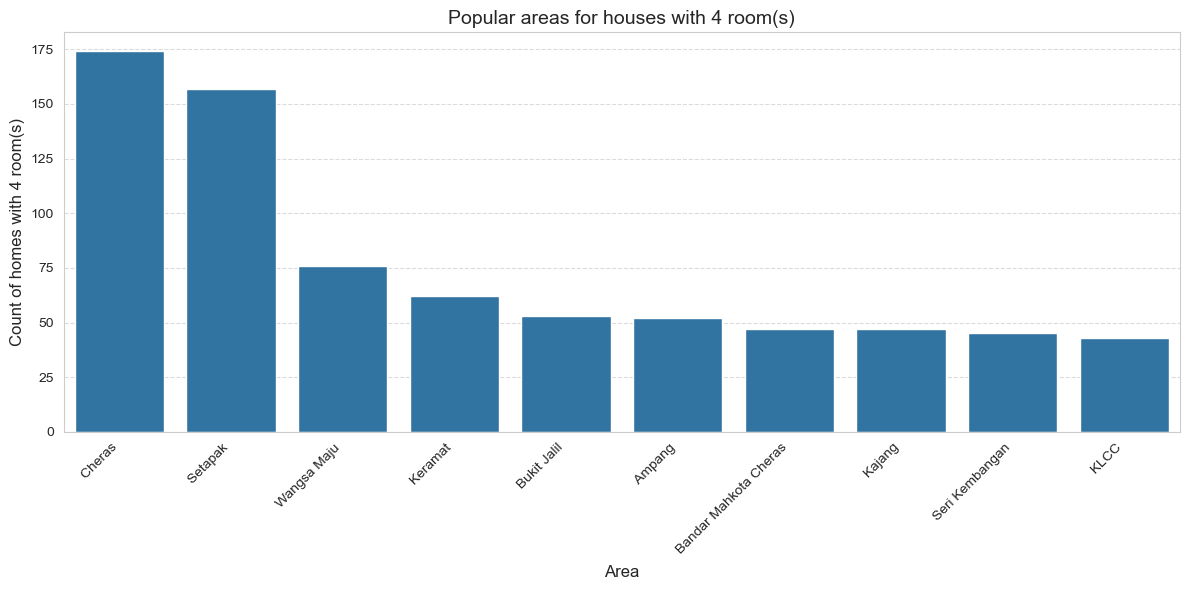

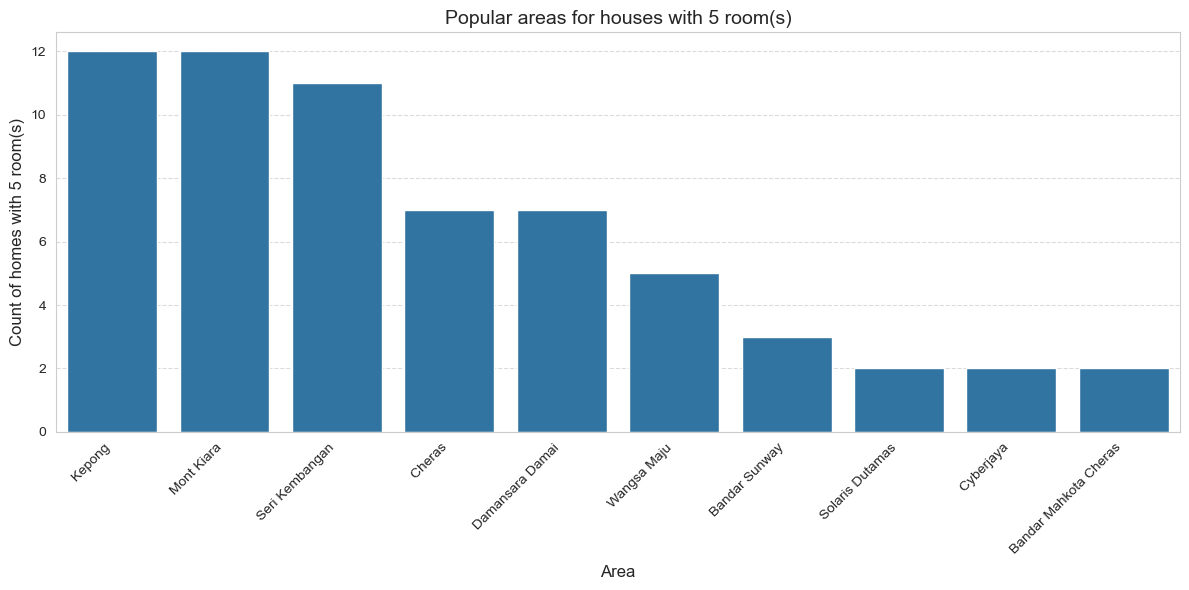

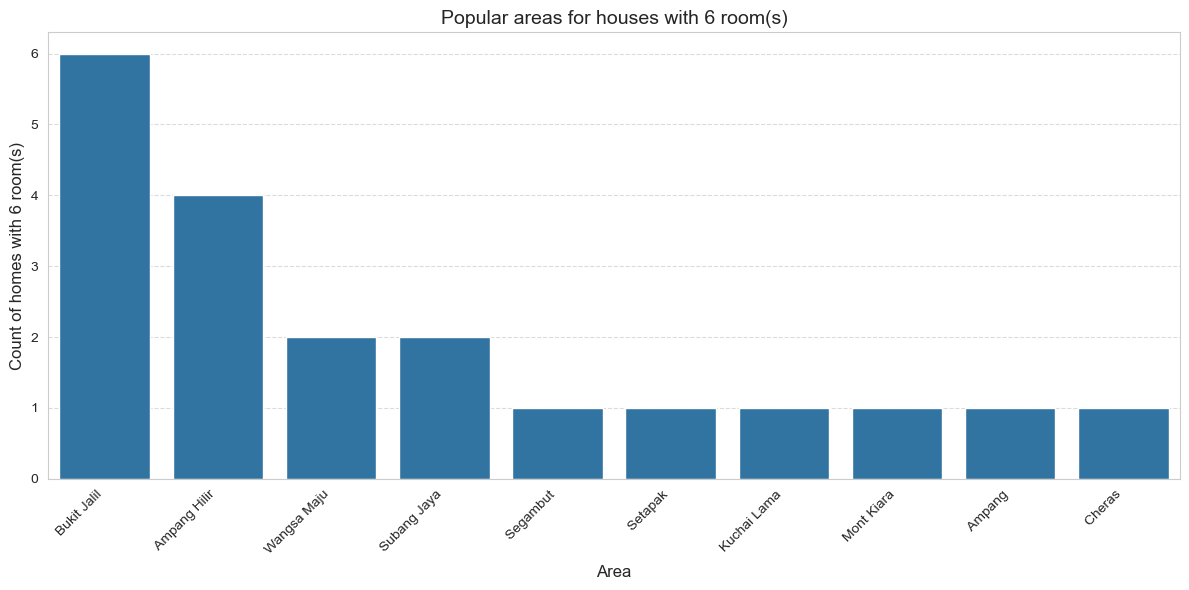

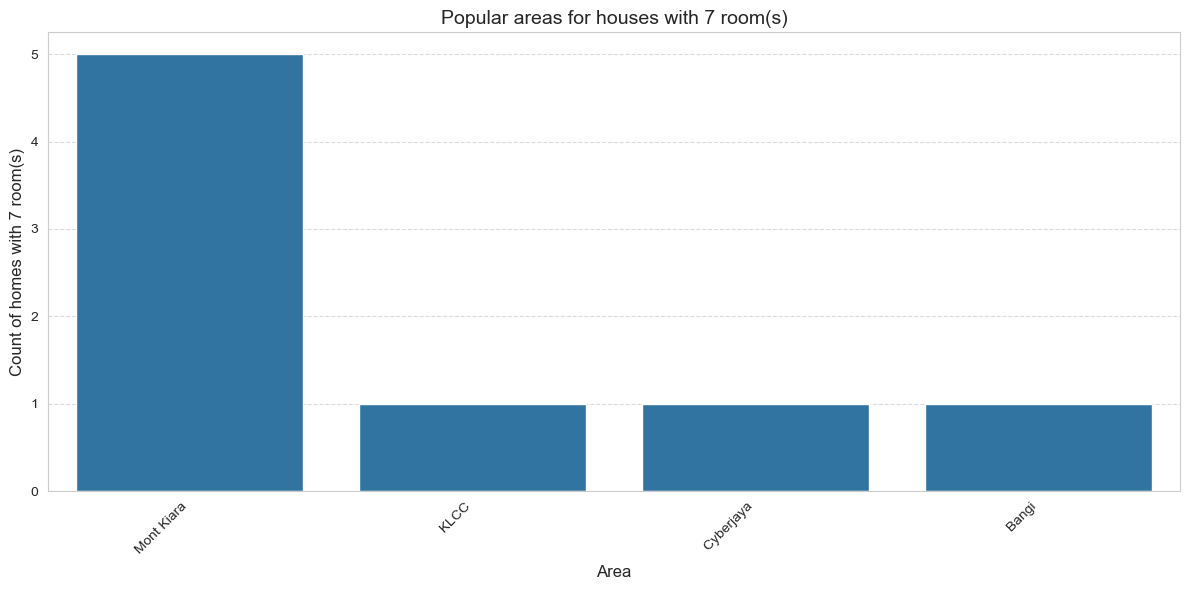

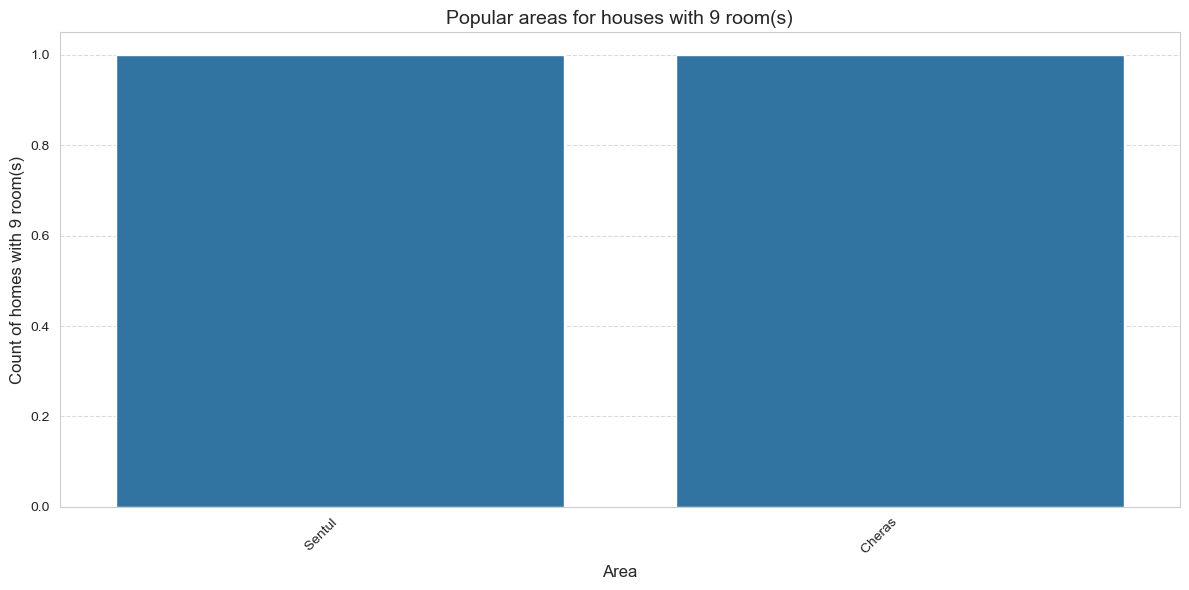

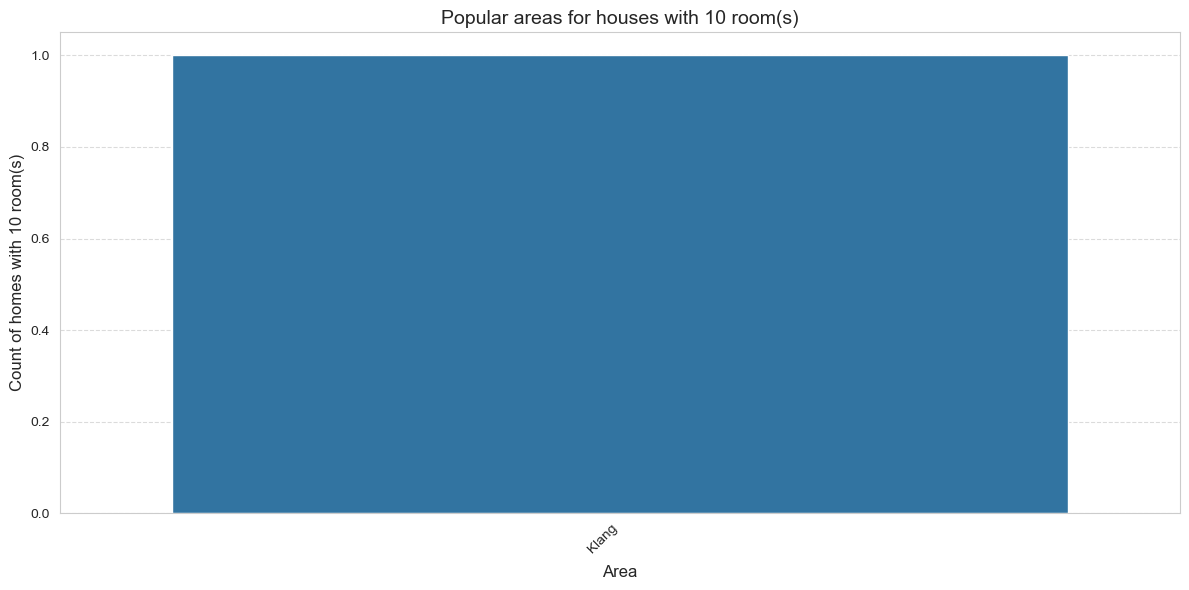

In [135]:


# Get unique room counts, exclude NaN values, and sort
unique_room_counts = sorted([int(x) for x in df['rooms'].unique() if pd.notna(x)])

# For each room size, create a visualization of top 10 areas
for room_size in unique_room_counts:
    # Filter data for current room size
    room_df = df[df['rooms'] == room_size]
    
    # Count homes by area for this room size
    area_counts = room_df['area'].value_counts().nlargest(10)
    
    # Create a bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=area_counts.index, y=area_counts.values)
    
    plt.title(f'Popular areas for houses with {room_size} room(s)', fontsize=14)
    plt.xlabel('Area', fontsize=12)
    plt.ylabel(f'Count of homes with {room_size} room(s)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    


**Analysis:**

- Figure 2.1 is used to compare median monthly rent per square foot by number of rooms to locate the most profitable room configuration. 
- Figure 2.2 compares the market share of various room sizes to find room configurations popular with tenants
- Figure 2.3 compares average house size by number of rooms to locate irregular data for number of rooms.
- Figure 2.4 compares average room size by number of rooms to locate irregular data for room sizes in different room configurations. 
- Figure 2.5 compares the top areas for different room number configurations to locate the most popular areas for certain room configurations.


- According to Figure 2.1, houses with only 1 room recorded the highest monthly rental yields at 2.5 MYR per square foot. This is closely followed by houses with 2 rooms that recorded 2.1 MYR per square foot

- According to Figure 2.2, houses with 3 rooms are dominant, with a 63.57% market share of total available housing stock recorded in our dataset

- When we looked at the data in Figure 2.3, we noticed that houses with 9 and 10 rooms are actually smaller than houses with 4 to 7 rooms. This led us to investigate further

- We can see an interesting phenomena where rooms from 1 to 7 range from 300 to 600 square feet. However, rooms in houses with 9 or 10 rooms are 135 and 100 square feet respectively in Figure 2.4

- Our further analysis in Figure 2.5 showed that there were only 2 houses with 9 rooms and 1 house with 10 rooms. We can assume that these 3 houses are outliers that should not be used in our analysis. 

**Conclusion:**

- Our investor should invest in houses with 1 or 2 rooms for the highest rental yields.

- However, our investor also has to consider factors like the ease of finding renters so that a high occupancy rate can be maintained. Empty homes do not earn any returns. 

- If our investor's priority is catering to the largest demographic of renters, our investor should choose houses with 3 rooms since they are popular with renters, as shown by their dominant market share. 

Different renters have different needs that dictate the number of rooms that they choose:

1. Working professionals that live alone, or with a single partner. 
2. Families/ Students that need a place to reside. 

- Areas with a large number of working professionals will be suitable areas to purchase houses with only 1 room. <br> The top 3 areas are Cyberjaya, Shah Alam, and Cheras

- Areas with a large number of families/students are suitable areas to purchase houses with 3 rooms or more. <br> The top 3 areas are Cheras, Kajang and Setapak




## Question: Which locations have the highest rents?

**Name**: Natalie Saw<br>
**Variables used**: `area`, `monthly_rent`, `size`<br>
**Graph used**: Bar chart, Box and whisker plot




Figure 3.1 Top 10 Areas with Highest Median Monthly Rent in Malaysia

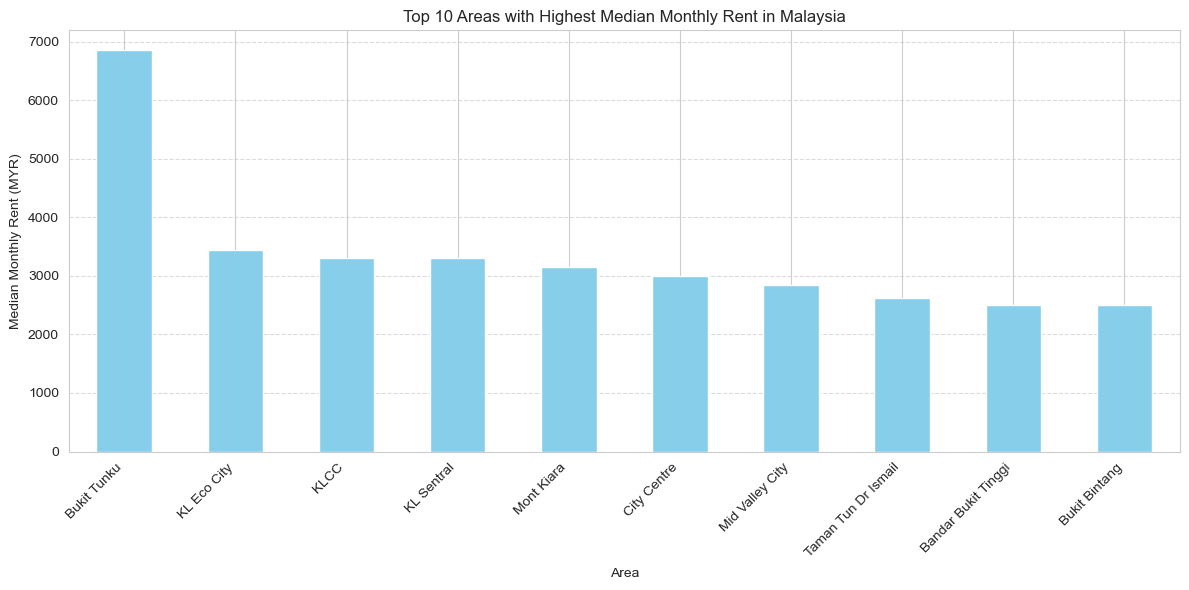

In [139]:
# Group by area and calculate median monthly rent
avg_rent_by_area = df.groupby('area')['monthly_rent'].median().sort_values(ascending=False).head(10)

# Plot the top 10 areas with highest rent
plt.figure(figsize=(12, 6))
avg_rent_by_area.plot(kind='bar', color='skyblue')
plt.title('Top 10 Areas with Highest Median Monthly Rent in Malaysia')
plt.xlabel('Area')
plt.ylabel('Median Monthly Rent (MYR)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Figure 3.2 Top 10 Areas by Median Monthly Rent per Square Foot

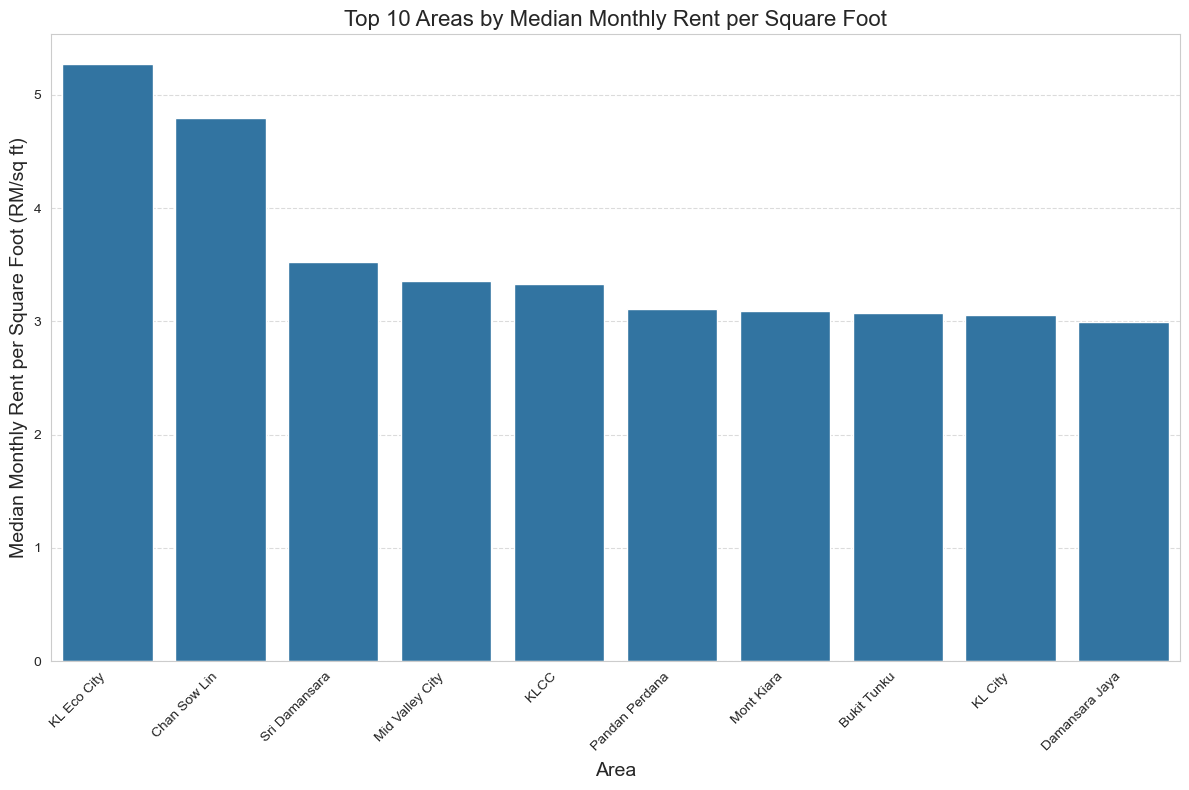

In [141]:


# Calculate rent per size for each record
df['rent_per_size'] = df['monthly_rent'] / df['size']

# Calculate median rent_per_size by area
median_rent_per_size_by_area = df.groupby('area')['rent_per_size'].median().reset_index()

# Sort the data by median rent per size for better visualization
median_rent_per_size_by_area = median_rent_per_size_by_area.sort_values('rent_per_size', ascending=False)

# Get only the top 10 areas by rent per size ratio
top10_rent_per_size = median_rent_per_size_by_area.head(10)

# Plot the second bar chart - top 10 areas by median rent per size
plt.figure(figsize=(12, 8))
sns.barplot(x='area', y='rent_per_size', data=top10_rent_per_size)
plt.title('Top 10 Areas by Median Monthly Rent per Square Foot', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Median Monthly Rent per Square Foot (RM/sq ft)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('top10_rent_per_size_by_area.png')
plt.show()

Figure 3.3 Property and Monthly Sizes by Area (Case Study)

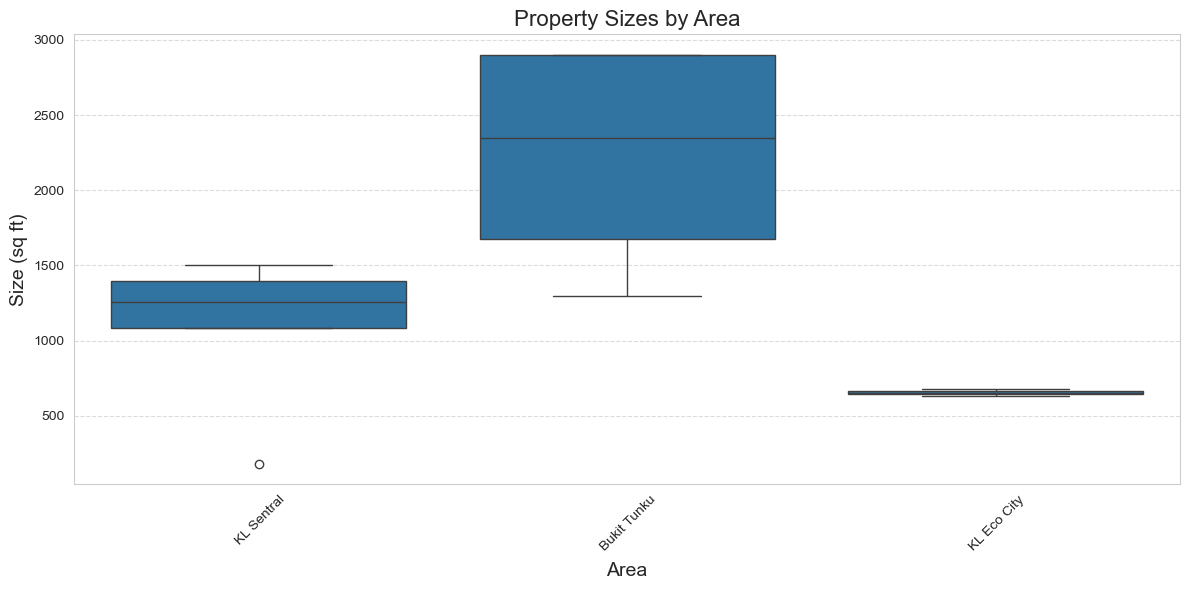

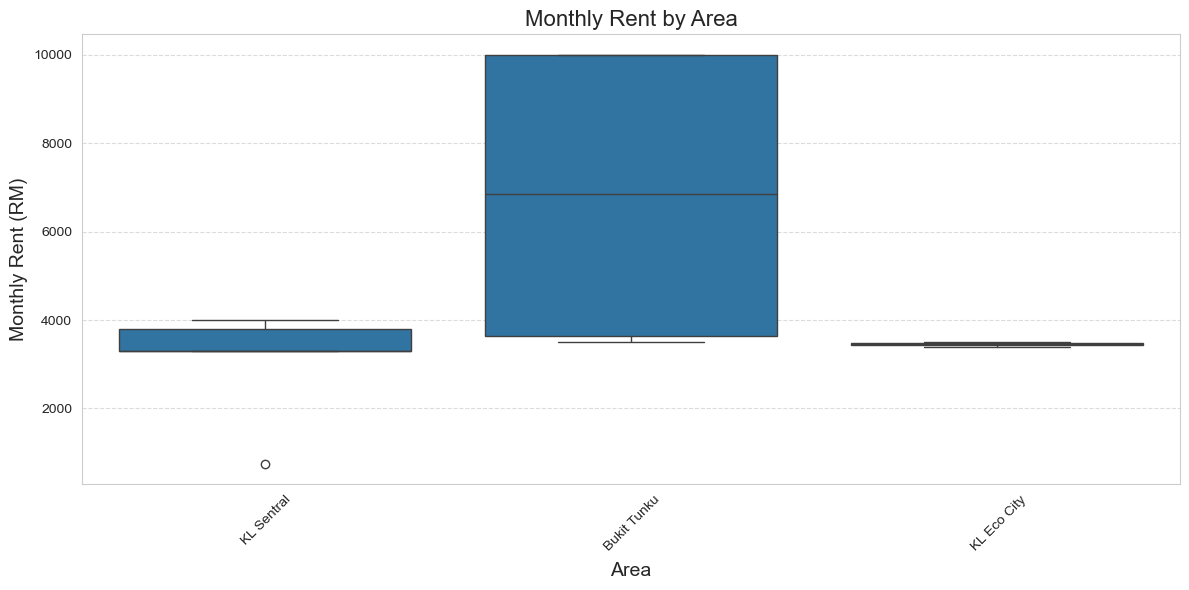

In [143]:


# Define our target areas WITH the leading spaces
areas_of_interest = [" Bukit Tunku", " KL Sentral", " KL Eco City"]

# Filter data for the specified areas
filtered_data = df[df['area'].isin(areas_of_interest)]

# Calculate the median size for each area
median_sizes = filtered_data.groupby('area')['size'].median().reset_index()





# Create separate box plots for size and monthly rent

# 1. Box plot for property sizes
plt.figure(figsize=(12, 6))
sns.boxplot(x='area', y='size', data=filtered_data)
plt.title('Property Sizes by Area', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Size (sq ft)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('property_sizes_boxplot.png')
plt.show()

# 2. Box plot for monthly rent
plt.figure(figsize=(12, 6))
sns.boxplot(x='area', y='monthly_rent', data=filtered_data)
plt.title('Monthly Rent by Area', fontsize=16)
plt.xlabel('Area', fontsize=14)
plt.ylabel('Monthly Rent (RM)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('monthly_rent_boxplot.png')
plt.show()







**Data Analysis:**

By comparing Figure 3.1 and Figure 3.2, median rent per square feet can be considered a more accurate metric for evaluating rental yields because it accounts for the size of the house. 

According to our analysis in Figure 3.2, the top 3 areas that have the highest rental yields are:
1. KL Eco City
2. Chan Sow Lin
3. Sri Damansara

- Bukit Tunku is the area with the highest median monthly rent in Malaysia.
- KL Sentral has the fourth highest monthly rent in Malaysia. 
- However, both areas are not in the top 10 for median monthly rent per square feet. 

- In Figure 3.3, we will use the large discrepancy to explain why median monthly rent per square foot is a more accurate metric for assessing rental yields. We can see from the box and whisker plot that KL Eco City has significantly smaller house sizes but it has high rents. Therefore, using the metric of median rent per square feet, KL Eco City is in fact the most expensive area to rent in Malaysia.

## Question: How does furnishing affect rent?

**Name:** Keshav <br>
**Variables used:** furnished, count, monthly_rent, size <br>
**Graphs used:** Bar chart <br>


Figure 4.1 Market Share by Furnished Status

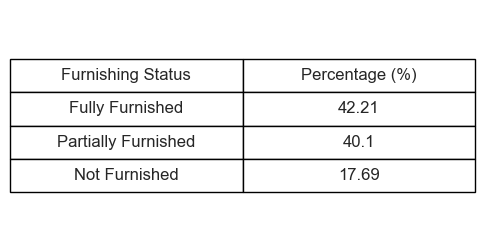

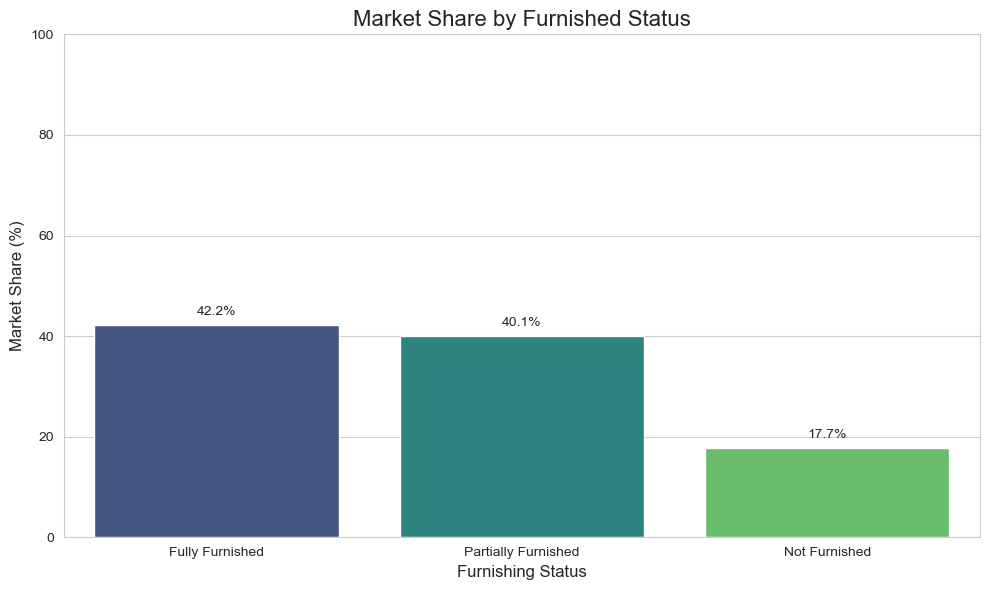

In [147]:
# Count the occurrences of each furnished status
furnished_counts = df['furnished'].value_counts()

# Calculate percentages
market_share = furnished_counts / furnished_counts.sum() * 100

# Create a new DataFrame for visualization
market_share_df = pd.DataFrame({
    'furnished': market_share.index,
    'percentage': market_share.values
})

# Optional: Round values
market_share_df['percentage'] = market_share_df['percentage'].round(2)

# Plot a table using matplotlib
fig, ax = plt.subplots(figsize=(6, 3))  # Adjust size as needed
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=market_share_df.values,
                 colLabels=['Furnishing Status','Percentage (%)'],
                 loc='center',
                 cellLoc='center',
                 colLoc='center')
table.scale(1, 2)  # Adjust row height
table.auto_set_font_size(False)
table.set_fontsize(12)

# Show the table
#plt.title('Market Share by Furnished Status', fontsize=14, pad=20)
#plt.tight_layout()
#plt.show()

# Set the plot style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create the bar chart - updated to use hue instead of palette directly
ax = sns.barplot(x='furnished', y='percentage', data=market_share_df, 
                hue='furnished', legend=False, palette='viridis')

# Add percentage labels on top of each bar
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.1f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'bottom',
                xytext = (0, 5), textcoords = 'offset points')

# Set titles and labels
plt.title('Market Share by Furnished Status', fontsize=16)
plt.xlabel('Furnishing Status', fontsize=12)
plt.ylabel('Market Share (%)', fontsize=12)
plt.ylim(0, 100)  # Set y-axis range from 0 to 100%

# Show the plot
plt.tight_layout()
plt.show()





### Data Analysis:

Based on Figure 4.1:

- Fully Furnished properties dominate with 42.2% of the market

- Partially Furnished properties are a close second at 40.1%

- Not Furnished properties represent a much smaller segment at 17.7%

### Conclusion

- The Malaysian rental market in Selanngor strongly favors furnished or partially furnished properties, which together account for over 82.3% of listings

- There's a clear tenant preference (or landlord offering preference) for properties with some level of furnishing

- The minimal difference between Fully Furnished (42.2%) and Partially Furnished (40.1%) suggests both options are similarly popular






### Next, we see how  different furnishing status of properties affects the median monthly rent and median rent per square meter

#### 1) Table

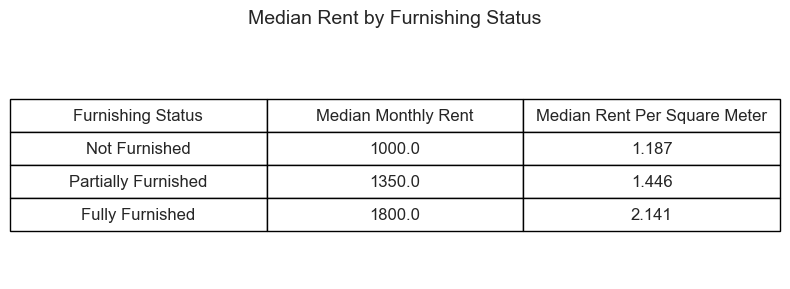

In [150]:
# Calculate rent per square meter
df['rent_per_sqm'] = df['monthly_rent'] / df['size']

# Make sure furnishing status is properly ordered
furnishing_order = ["Not Furnished", "Partially Furnished", "Fully Furnished"]

# Convert furnished column to categorical with proper order
df['furnished'] = pd.Categorical(df['furnished'], categories=furnishing_order, ordered=True)

# Aggregate data by furnished status with explicit observed parameter
grouped_data = df.groupby('furnished', observed=False).agg({
    'monthly_rent': 'median',
    'rent_per_sqm': 'median'
}).reset_index()

# Round off to 3 decimal places
grouped_data = grouped_data.round(3)

# Plot a table using matplotlib
fig, ax = plt.subplots(figsize=(8, 3))  # Adjust size as needed
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=grouped_data.values,
                 colLabels=['Furnishing Status','Median Monthly Rent','Median Rent Per Square Meter'],
                 loc='center',
                 cellLoc='center',
                 colLoc='center')

table.scale(1, 2)  # Adjust row height
table.auto_set_font_size(False)
table.set_fontsize(12)

# Show the table
plt.title('Median Rent by Furnishing Status', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

#### 2) Graphs & Analysis

Figure 4.2 : Median Monthly Rent vs Median Monthly Rent per Square Feet by Furnishing Status

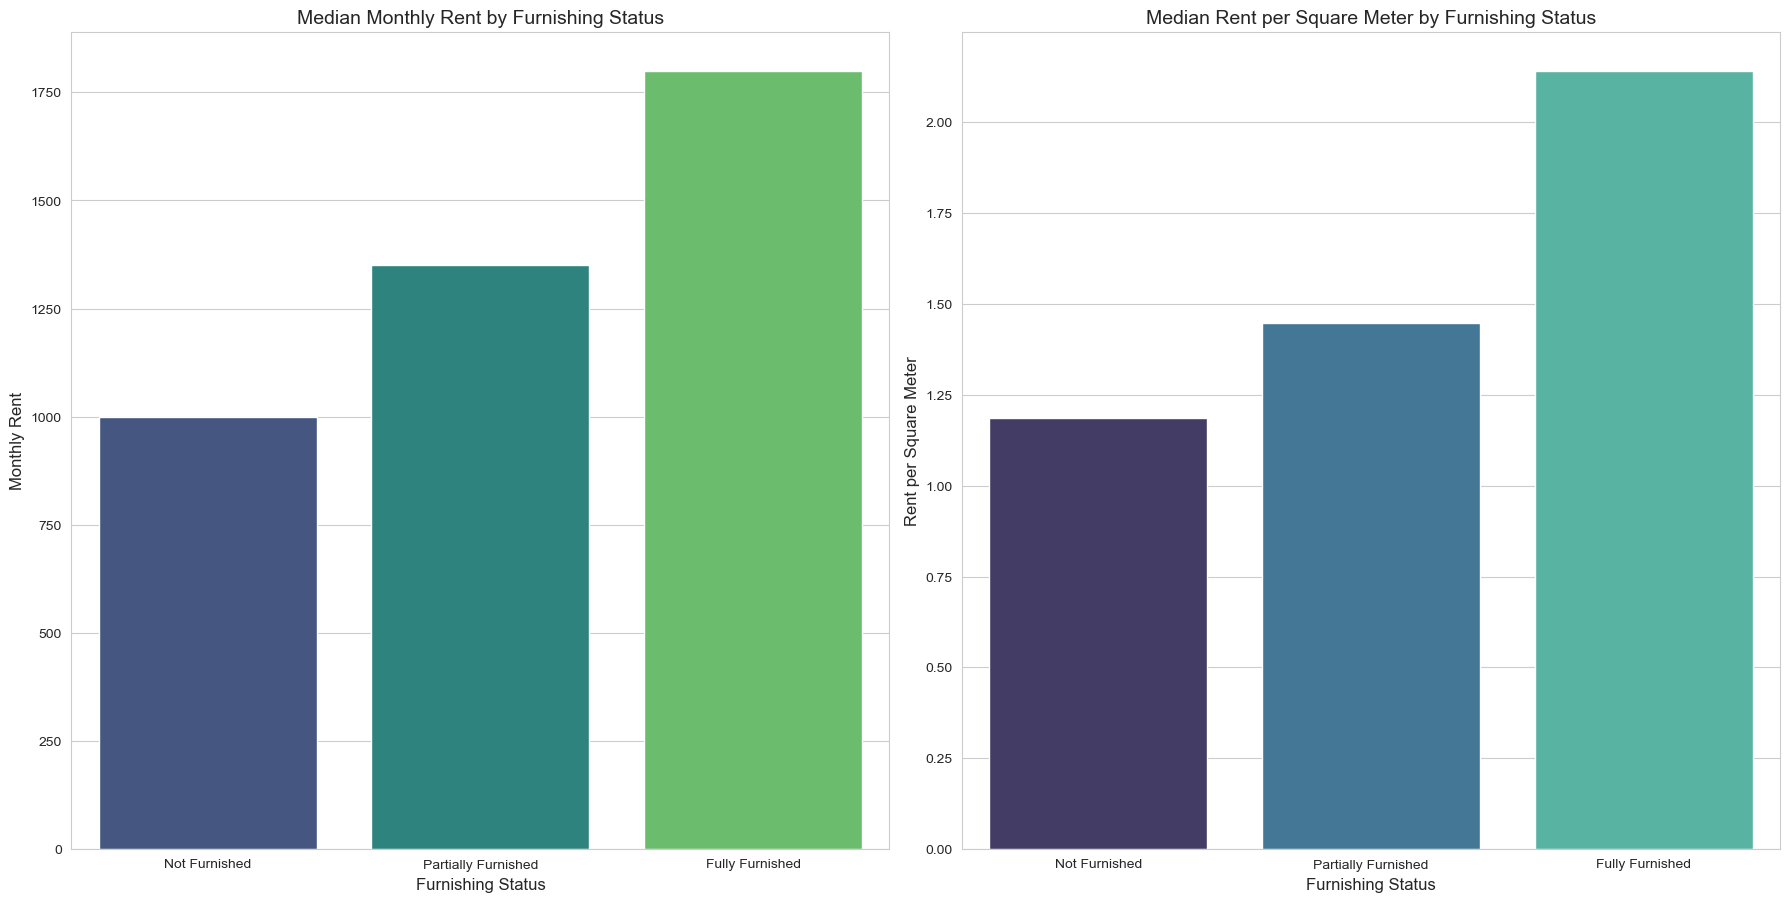

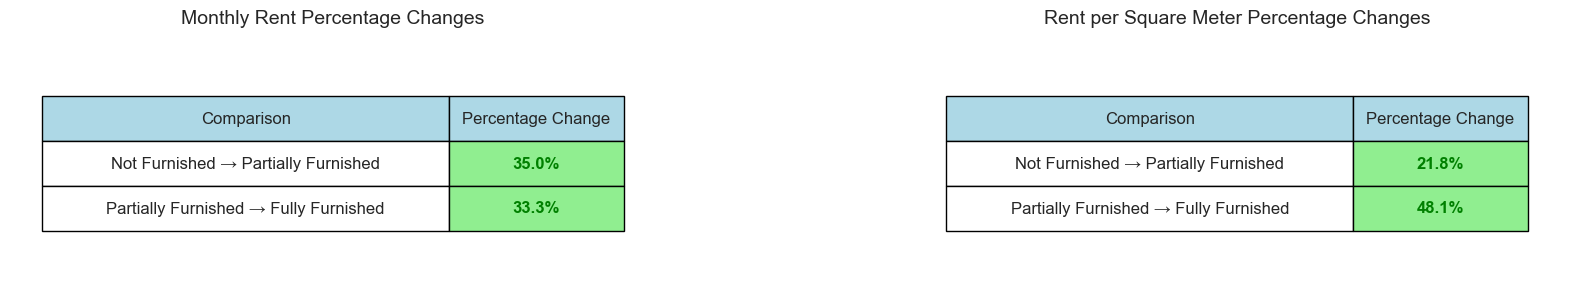

In [153]:
# Create figure with subplots - 2 rows, 2 columns
fig = plt.figure(figsize=(18, 12))
grid = plt.GridSpec(2, 2, height_ratios=[3, 1])

# Bar chart for monthly rent (top left)
ax1 = plt.subplot(grid[0, 0])
sns.barplot(x='furnished', y='monthly_rent', data=grouped_data, ax=ax1, 
            hue='furnished', legend=False, palette='viridis', order=furnishing_order)
ax1.set_title('Median Monthly Rent by Furnishing Status', fontsize=14)
ax1.set_xlabel('Furnishing Status', fontsize=12)
ax1.set_ylabel('Monthly Rent', fontsize=12)

# Bar chart for rent per square meter (top right)
ax2 = plt.subplot(grid[0, 1])
sns.barplot(x='furnished', y='rent_per_sqm', data=grouped_data, ax=ax2, 
            hue='furnished', legend=False, palette='mako', order=furnishing_order)
ax2.set_title('Median Rent per Square Meter by Furnishing Status', fontsize=14)
ax2.set_xlabel('Furnishing Status', fontsize=12)
ax2.set_ylabel('Rent per Square Meter', fontsize=12)

plt.tight_layout()
plt.show()

# Create figure with subplots - 2 rows, 2 columns
fig, axs = plt.subplots(2, 2, figsize=(20, 14), height_ratios=[3, 1])  # Increased overall figure size

# Unpack the axes
ax3 = axs[1, 0]  # Bottom left
ax4 = axs[1, 1]  # Bottom right

# Clear the top axes (we're not using them in this snippet)
axs[0, 0].set_visible(False)
axs[0, 1].set_visible(False)

# Percentage table for monthly rent (bottom left)
ax3.axis('tight')
ax3.axis('off')

# Calculate percentage changes for monthly rent
pct_labels = []
pct_data = []
colors = []
for i in range(len(furnishing_order)-1):
    current = grouped_data.loc[grouped_data['furnished'] == furnishing_order[i], 'monthly_rent'].values[0]
    next_val = grouped_data.loc[grouped_data['furnished'] == furnishing_order[i+1], 'monthly_rent'].values[0]
    pct_change = ((next_val - current) / current) * 100
    
    comparison = f"{furnishing_order[i]} → {furnishing_order[i+1]}"
    pct_labels.append(comparison)
    pct_data.append(f"{pct_change:.1f}%")
    
    # Green for increase, red for decrease
    colors.append('green' if pct_change >= 0 else 'red')

# Create monthly rent percentage table with wider bounds
table_data = list(zip(pct_labels, pct_data))
monthly_table = ax3.table(cellText=table_data, 
                          colLabels=['Comparison', 'Percentage Change'],
                          loc='center', 
                          cellLoc='center',
                          colColours=['lightblue', 'lightblue'],
                          bbox=[0.05, 0.2, 0.9, 0.6])  # Wider width (0.9) and adjusted positioning

# Adjust column widths (make first column wider)
col_widths = [0.7, 0.3]  # 70% for Comparison column, 30% for Percentage column
for i, width in enumerate(col_widths):
    # Set column widths for header and data cells
    monthly_table[(0, i)].set_width(width)
    for row in range(1, len(table_data) + 1):
        monthly_table[(row, i)].set_width(width)

monthly_table.auto_set_font_size(False)
monthly_table.set_fontsize(12)
monthly_table.scale(1.5, 1.5)  # Balanced scale factor

# Color the percentage cells
for i, color in enumerate(colors):
    monthly_table[(i+1, 1)].set_facecolor('lightgreen' if color == 'green' else 'lightcoral')
    monthly_table[(i+1, 1)].set_text_props(color=color, weight='bold')

ax3.set_title('Monthly Rent Percentage Changes', fontsize=14, pad=20)

# Percentage table for rent per square meter (bottom right)
ax4.axis('tight')
ax4.axis('off')

# Calculate percentage changes for rent per square meter
pct_labels = []
pct_data = []
colors = []
for i in range(len(furnishing_order)-1):
    current = grouped_data.loc[grouped_data['furnished'] == furnishing_order[i], 'rent_per_sqm'].values[0]
    next_val = grouped_data.loc[grouped_data['furnished'] == furnishing_order[i+1], 'rent_per_sqm'].values[0]
    pct_change = ((next_val - current) / current) * 100
    
    comparison = f"{furnishing_order[i]} → {furnishing_order[i+1]}"
    pct_labels.append(comparison)
    pct_data.append(f"{pct_change:.1f}%")
    
    # Green for increase, red for decrease
    colors.append('green' if pct_change >= 0 else 'red')

# Create rent per square meter percentage table with wider bounds
table_data = list(zip(pct_labels, pct_data))
sqm_table = ax4.table(cellText=table_data, 
                      colLabels=['Comparison', 'Percentage Change'],
                      loc='center', 
                      cellLoc='center',
                      colColours=['lightblue', 'lightblue'],
                      bbox=[0.05, 0.2, 0.9, 0.6])  # Wider width (0.9) and adjusted positioning

# Adjust column widths (make first column wider)
col_widths = [0.7, 0.3]  # 70% for Comparison column, 30% for Percentage column
for i, width in enumerate(col_widths):
    # Set column widths for header and data cells
    sqm_table[(0, i)].set_width(width)
    for row in range(1, len(table_data) + 1):
        sqm_table[(row, i)].set_width(width)

sqm_table.auto_set_font_size(False)
sqm_table.set_fontsize(12)
sqm_table.scale(1.5, 1.5)  # Balanced scale factor

# Color the percentage cells
for i, color in enumerate(colors):
    sqm_table[(i+1, 1)].set_facecolor('lightgreen' if color == 'green' else 'lightcoral')
    sqm_table[(i+1, 1)].set_text_props(color=color, weight='bold')

ax4.set_title('Rent per Square Meter Percentage Changes', fontsize=14, pad=20)

# Increase spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()




### Data Analysis:

- Ensured the furnishing statuses are properly ordered from 'Not Furnished' to 'Partially Furnished' so that we can clearly see the impact of increasing the furnishing of properties with the median monthly rent and rent per square meter

According to Figure 4.2:

- **When we use median monthly rents to compare rental yields by furnished status:**

     * There is a 33.3% premium for Fully Furnished units compared to Partially Furnished Units 

     * There is a 35% premium for Partially Furnished units compared to Not Furnished Units

- **When we use median rent per square meter by furnished status:**

     * There is a 48.1% premium for Fully Furnished compared to  Partially Furnished Units

     * There is a 21.8% premium for Partially Furnished units compared to Not Furnished Units



### Conclusion

- Renovating rental properties to upgrade their furnishing status can result in significant  gains in rental yields.Going in depth, we can  see that the premium in terms of monthly rent when moving from Not Furnished to Partially Furnished (35%) is greater than rent per square meter percentage increase (21.8%). At the same time, when moving from Partially Furnished to Fully Furnished, the premium is significantly higher for rent per square meter (48.1%) than monthly rent (33.3%).This suggests basic furnishing provides greater absolute value, while premium furnishing maximizes value per square foot

- The data also suggests that fully furnished units may be larger/smaller due to the large difference between median rent and median rent per square meter


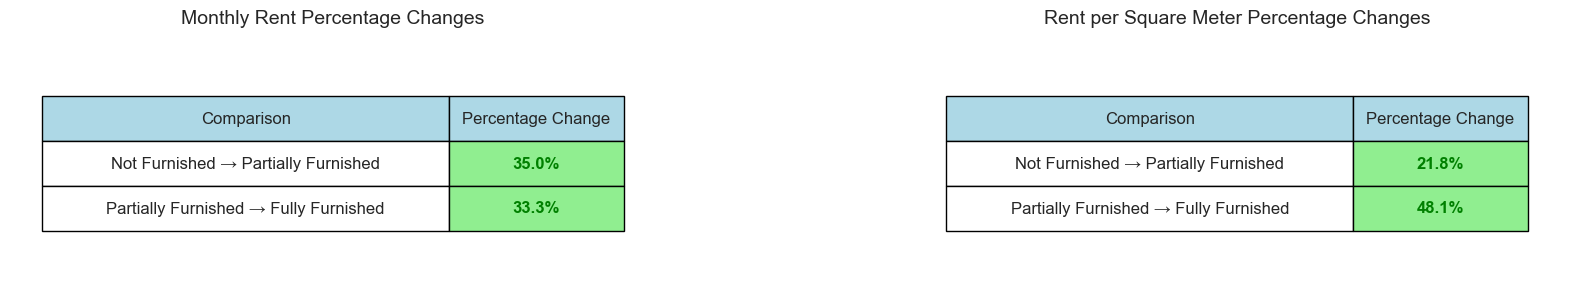

In [155]:
# Create figure with subplots - 2 rows, 2 columns
fig, axs = plt.subplots(2, 2, figsize=(20, 14), height_ratios=[3, 1])  # Increased overall figure size

# Unpack the axes
ax3 = axs[1, 0]  # Bottom left
ax4 = axs[1, 1]  # Bottom right

# Clear the top axes (we're not using them in this snippet)
axs[0, 0].set_visible(False)
axs[0, 1].set_visible(False)

# Percentage table for monthly rent (bottom left)
ax3.axis('tight')
ax3.axis('off')

# Calculate percentage changes for monthly rent
pct_labels = []
pct_data = []
colors = []
for i in range(len(furnishing_order)-1):
    current = grouped_data.loc[grouped_data['furnished'] == furnishing_order[i], 'monthly_rent'].values[0]
    next_val = grouped_data.loc[grouped_data['furnished'] == furnishing_order[i+1], 'monthly_rent'].values[0]
    pct_change = ((next_val - current) / current) * 100
    
    comparison = f"{furnishing_order[i]} → {furnishing_order[i+1]}"
    pct_labels.append(comparison)
    pct_data.append(f"{pct_change:.1f}%")
    
    # Green for increase, red for decrease
    colors.append('green' if pct_change >= 0 else 'red')

# Create monthly rent percentage table with wider bounds
table_data = list(zip(pct_labels, pct_data))
monthly_table = ax3.table(cellText=table_data, 
                          colLabels=['Comparison', 'Percentage Change'],
                          loc='center', 
                          cellLoc='center',
                          colColours=['lightblue', 'lightblue'],
                          bbox=[0.05, 0.2, 0.9, 0.6])  # Wider width (0.9) and adjusted positioning

# Adjust column widths (make first column wider)
col_widths = [0.7, 0.3]  # 70% for Comparison column, 30% for Percentage column
for i, width in enumerate(col_widths):
    # Set column widths for header and data cells
    monthly_table[(0, i)].set_width(width)
    for row in range(1, len(table_data) + 1):
        monthly_table[(row, i)].set_width(width)

monthly_table.auto_set_font_size(False)
monthly_table.set_fontsize(12)
monthly_table.scale(1.5, 1.5)  # Balanced scale factor

# Color the percentage cells
for i, color in enumerate(colors):
    monthly_table[(i+1, 1)].set_facecolor('lightgreen' if color == 'green' else 'lightcoral')
    monthly_table[(i+1, 1)].set_text_props(color=color, weight='bold')

ax3.set_title('Monthly Rent Percentage Changes', fontsize=14, pad=20)

# Percentage table for rent per square meter (bottom right)
ax4.axis('tight')
ax4.axis('off')

# Calculate percentage changes for rent per square meter
pct_labels = []
pct_data = []
colors = []
for i in range(len(furnishing_order)-1):
    current = grouped_data.loc[grouped_data['furnished'] == furnishing_order[i], 'rent_per_sqm'].values[0]
    next_val = grouped_data.loc[grouped_data['furnished'] == furnishing_order[i+1], 'rent_per_sqm'].values[0]
    pct_change = ((next_val - current) / current) * 100
    
    comparison = f"{furnishing_order[i]} → {furnishing_order[i+1]}"
    pct_labels.append(comparison)
    pct_data.append(f"{pct_change:.1f}%")
    
    # Green for increase, red for decrease
    colors.append('green' if pct_change >= 0 else 'red')

# Create rent per square meter percentage table with wider bounds
table_data = list(zip(pct_labels, pct_data))
sqm_table = ax4.table(cellText=table_data, 
                      colLabels=['Comparison', 'Percentage Change'],
                      loc='center', 
                      cellLoc='center',
                      colColours=['lightblue', 'lightblue'],
                      bbox=[0.05, 0.2, 0.9, 0.6])  # Wider width (0.9) and adjusted positioning

# Adjust column widths (make first column wider)
col_widths = [0.7, 0.3]  # 70% for Comparison column, 30% for Percentage column
for i, width in enumerate(col_widths):
    # Set column widths for header and data cells
    sqm_table[(0, i)].set_width(width)
    for row in range(1, len(table_data) + 1):
        sqm_table[(row, i)].set_width(width)

sqm_table.auto_set_font_size(False)
sqm_table.set_fontsize(12)
sqm_table.scale(1.5, 1.5)  # Balanced scale factor

# Color the percentage cells
for i, color in enumerate(colors):
    sqm_table[(i+1, 1)].set_facecolor('lightgreen' if color == 'green' else 'lightcoral')
    sqm_table[(i+1, 1)].set_text_props(color=color, weight='bold')

ax4.set_title('Rent per Square Meter Percentage Changes', fontsize=14, pad=20)

# Increase spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

plt.show()

## How are property sizes changing? What are driving these changes?

**Name:** Keshav <br>
**Variables used:** size, monthly_rent, area, rooms, property_type <br>
**Graphs used:** Bar chart, Line chart <br>


#### Figure 5.1: Median Monthly Rent per Square Feet by Completion Year & Rent per Square Feet Growth Percentage

##### Graphs

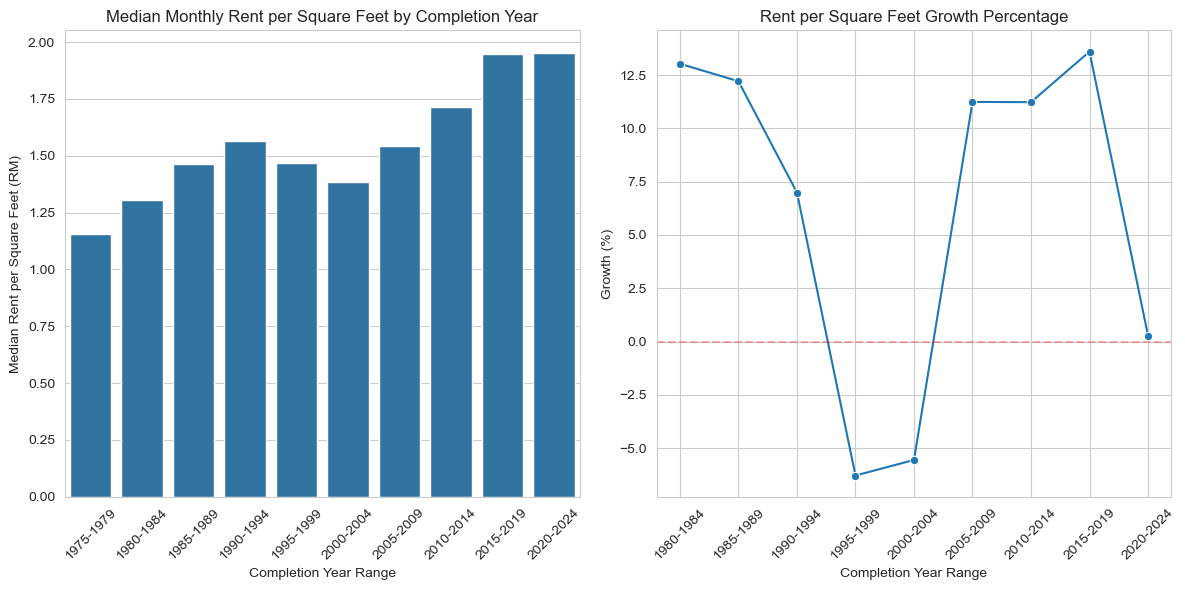

In [159]:
# Ensure completion_year is numeric
df['completion_year'] = pd.to_numeric(df['completion_year'], errors='coerce')

# Remove invalid or unrealistic sizes (e.g., less than 10 sqm)
df = df[df['size'] >= 10]

# Filter out all properties larger than 15,000 square feet (changed from 40,000)
df = df[df['size'] <= 14000]  # Changed this line


# Calculate rent per square meter
df['rent_per_sqf'] = df['monthly_rent'] / df['size']

# Drop rows with missing values in key columns
df = df.dropna(subset=['completion_year', 'rent_per_sqf', 'size', 'property_type'])

# Create 5-year intervals
min_year = int(df['completion_year'].min())
max_year = int(df['completion_year'].max())

# Round years to nearest 5-year interval
min_year = min_year - (min_year % 5)
max_year = max_year + (5 - max_year % 5) if max_year % 5 != 0 else max_year

# Create intervals and labels
intervals = list(range(min_year, max_year + 5, 5))
labels = [f"{intervals[i]}-{intervals[i+1]-1}" for i in range(len(intervals)-1)]

# Create interval column
df['interval'] = pd.cut(df['completion_year'], bins=intervals, labels=labels, right=False)

# Group by interval with observed=False to silence warning
result = df.groupby('interval', observed=False)['rent_per_sqf'].median().reset_index()  # Added observed=False
result.columns = ['Year Range', 'Median Rent per Square Feet']

# Calculate percentage growth
result['Previous Median'] = result['Median Rent per Square Feet'].shift(1)
result['Growth (%)'] = ((result['Median Rent per Square Feet'] - result['Previous Median']) / 
                      result['Previous Median'] * 100).round(2)
result['Growth (%)'] = result['Growth (%)'].apply(lambda x: f"{x}%" if pd.notnull(x) else "N/A")
result = result.drop('Previous Median', axis=1)

# Create display version
result_display = result.copy()
result_display['Median Rent per Square Feet'] = result_display['Median Rent per Square Feet'].apply(lambda x: f"RM {x:.2f}")

# Visualizations
plt.figure(figsize=(12, 6))

# Bar plot
ax1 = plt.subplot(1, 2, 1)
sns.barplot(x='Year Range', y='Median Rent per Square Feet', data=result, ax=ax1)
ax1.set_title('Median Monthly Rent per Square Feet by Completion Year')
ax1.set_xlabel('Completion Year Range')
ax1.set_ylabel('Median Rent per Square Feet (RM)')
ax1.tick_params(axis='x', rotation=45)

# Line plot for growth
growth_data = result[result['Growth (%)'] != 'N/A'].copy()
if not growth_data.empty:
    growth_data['Growth (%)'] = growth_data['Growth (%)'].str.rstrip('%').astype(float)
    ax2 = plt.subplot(1, 2, 2)
    sns.lineplot(x='Year Range', y='Growth (%)', data=growth_data, marker='o', ax=ax2)
    ax2.set_title('Rent per Square Feet Growth Percentage')
    ax2.set_xlabel('Completion Year Range')
    ax2.set_ylabel('Growth (%)')
    ax2.tick_params(axis='x', rotation=45)
    ax2.axhline(y=0, color='r', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

##### Figure 5.2: Rent per Square Feet Analysis by 5-Year Intervals

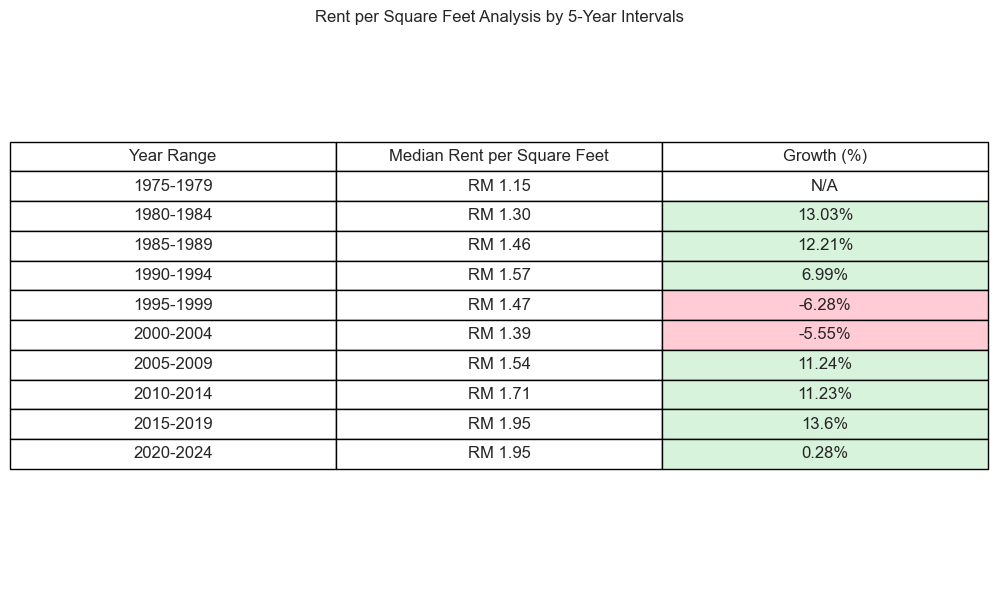

In [161]:
# Create a table visualization
fig_table, ax_table = plt.subplots(figsize=(10, len(result_display)*0.5 + 1))
ax_table.axis('tight')
ax_table.axis('off')

table = ax_table.table(
    cellText=result_display.values,
    colLabels=result_display.columns,
    loc='center',
    cellLoc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

# Color the growth cells based on positive/negative values
for i in range(1, len(result_display) + 1):
    cell = table[i, 2]  # Growth % column
    cell_text = cell.get_text().get_text()
    
    if cell_text != "N/A":
        value = float(cell_text.strip('%'))
        if value > 0:
            cell.set_facecolor('#d8f3dc')  # Light green for positive
        elif value < 0:
            cell.set_facecolor('#ffccd5')  # Light red for negative

plt.title('Rent per Square Feet Analysis by 5-Year Intervals')
plt.tight_layout()
plt.show()






📊 Summary of Size-Adjusted Rent Analysis
• Overall Median Rent per Square Feet : RM 1.82
• Rent per Square Feet Range          : RM 0.09 to RM 932.76

🏠 Property Size Statistics
• Median Property Size : 904.0 sqft
• Average Property Size: 937.2 sqft
• Size Range           : 13.0 sqft to 9001.0 sqft


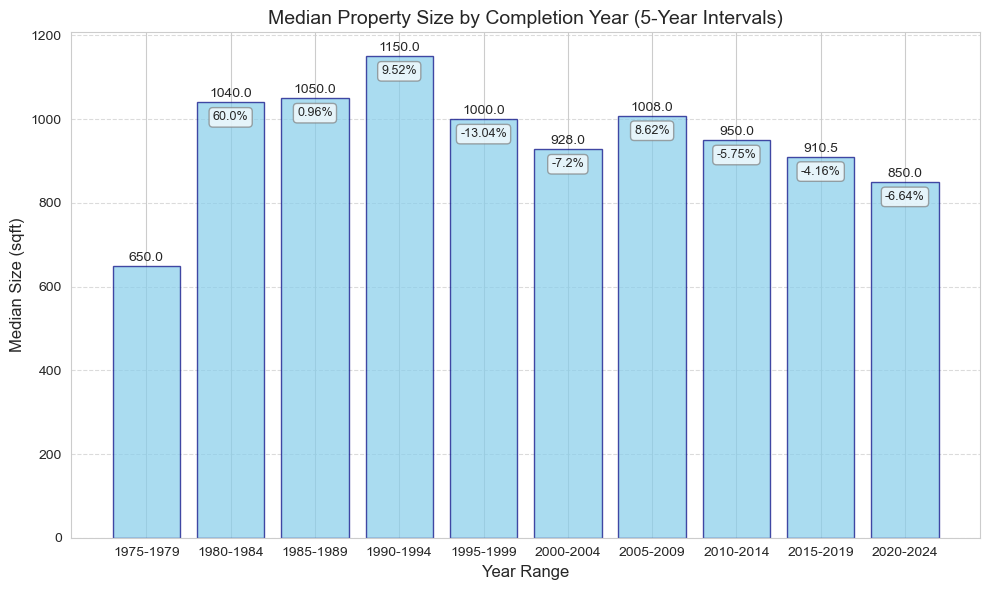

In [162]:
# Summary of Size-Adjusted Rent Analysis
print("\n📊 Summary of Size-Adjusted Rent Analysis")
print(f"• Overall Median Rent per Square Feet : RM {df['rent_per_sqf'].median():.2f}")
print(f"• Rent per Square Feet Range          : RM {df['rent_per_sqf'].min():.2f} to RM {df['rent_per_sqf'].max():.2f}")
# Property Size Statistics
print("\n🏠 Property Size Statistics")
print(f"• Median Property Size : {df['size'].median():.1f} sqft")
print(f"• Average Property Size: {df['size'].mean():.1f} sqft")
print(f"• Size Range           : {df['size'].min():.1f} sqft to {df['size'].max():.1f} sqft")

# Create a dataframe showing median property size by year with growth indicators
size_by_year = df.groupby('interval', observed=False)['size'].median().reset_index()
size_by_year.columns = ['Year Range', 'Median Size (sqft)']

# Calculate growth percentages
size_by_year['Previous Size'] = size_by_year['Median Size (sqft)'].shift(1)
size_by_year['Size Growth (%)'] = ((size_by_year['Median Size (sqft)'] - size_by_year['Previous Size']) / 
                                 size_by_year['Previous Size'] * 100).round(2)

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot bars
bars = ax.bar(size_by_year['Year Range'], size_by_year['Median Size (sqft)'], 
              color='skyblue', edgecolor='navy', alpha=0.7)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 5,
            f'{height:.1f}', ha='center', va='bottom', fontsize=10)

# Add growth percentage annotations
for i, (growth, height) in enumerate(zip(size_by_year['Size Growth (%)'].fillna("N/A"), 
                                         size_by_year['Median Size (sqft)'])):
    if growth != "N/A":
        ax.annotate(f'{growth}%', 
                    xy=(i, height - 50),  # Position slightly below the top
                    ha='center', 
                    va='bottom',
                    fontsize=9,
                    
                    bbox=dict(boxstyle="round,pad=0.3", fc='white', ec='gray', alpha=0.7))

# Set chart title and labels
ax.set_title('Median Property Size by Completion Year (5-Year Intervals)', fontsize=14)
ax.set_xlabel('Year Range', fontsize=12)
ax.set_ylabel('Median Size (sqft)', fontsize=12)

# Set y-axis to start from 0
ax.set_ylim(bottom=0)

# Add grid lines for better readability
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Tighten layout
plt.tight_layout()

# Show the plot
plt.show()





### Data Analysis:

* Removed unrealistically small property sizes below 10 sqft and large property sizes above 15000 square feet which consist of apartments and condominiums which realistically wouldnt be found in Selangor 
for these property types.
* Ensures all the values of completion_year are numeric and any value that cannot be converted into a number will be converted to NaN which represents missing values
* Removed multiple properties with missing values of completion_year , property_type,  rent_per_sqm ( caused by invalid or missing values from monthly_rent and size )
   the furnishing of properties with the median monthly rent and rent per square meter

  According to Figure 5.1 and Figure 5.2:

- **Periods of Strong Growth (1980–1989 & 2005–2019)::**

     * These periods saw double-digit increases in rent per square foot.

     * Suggestive of high demand and/or tight supply, especially in urbanising areas.
 
     * Likely driven by economic optimism, urban migration, and infrastructure development.

- **Periods of Decline (1995–2004):**

     * Two consecutive periods of negative growth.
 
     * Indicative of market correction, economic downturns, or oversupply.

     * Possibly larger units were being offered, reducing the per square foot rental value.
 
- **Recent Slowdown (2020–2024)**

     * Growth nearly flat at 0.28%.
 
     * Indicative of market correction, economic downturns, or oversupply.
 
        * COVID-19 pandemic impact,
        * Increased supply of high-rise units
        * Renters reaching affordability limits.

   



### Conclusion:

- Changes in the growth rate of rent per square foot in Selangor mirror the broader economic cycles and housing trends. Accelerating growth indicates rising demand and likely smaller, high-value units, while declining growth or stagnation points to market corrections, affordability issues, or changing consumer preferences. Understanding these shifts helps explain why and how property sizes may have changed across different time periods.







##### Expanded Descriptive Analysis
##### Figure 5.3: Median Property Size by Completion Year (5-Year Intervals)


📊 Summary of Size-Adjusted Rent Analysis
• Overall Median Rent per Square Feet : RM 1.82
• Rent per Square Feet Range          : RM 0.09 to RM 932.76

🏠 Property Size Statistics
• Median Property Size : 904.0 sqft
• Average Property Size: 937.2 sqft
• Size Range           : 13.0 sqft to 9001.0 sqft


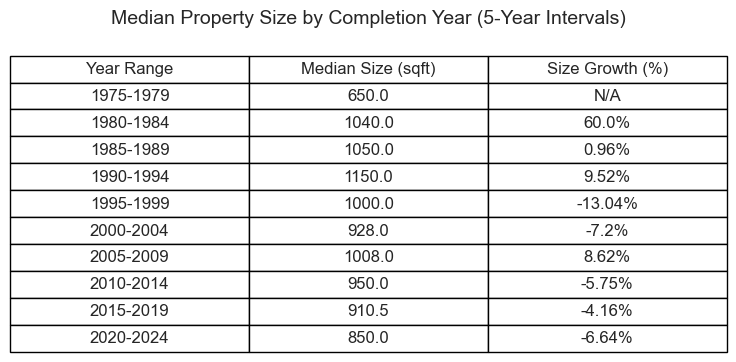

In [165]:
# Summary of Size-Adjusted Rent Analysis
print("\n📊 Summary of Size-Adjusted Rent Analysis")
print(f"• Overall Median Rent per Square Feet : RM {df['rent_per_sqf'].median():.2f}")
print(f"• Rent per Square Feet Range          : RM {df['rent_per_sqf'].min():.2f} to RM {df['rent_per_sqf'].max():.2f}")

# Property Size Statistics
print("\n🏠 Property Size Statistics")
print(f"• Median Property Size : {df['size'].median():.1f} sqft")
print(f"• Average Property Size: {df['size'].mean():.1f} sqft")
print(f"• Size Range           : {df['size'].min():.1f} sqft to {df['size'].max():.1f} sqft")

# Create a table showing median property size by year with growth indicators
size_by_year = df.groupby('interval', observed=False)['size'].median().reset_index()  # Added observed=False
size_by_year.columns = ['Year Range', 'Median Size (sqft)']

# Calculate growth percentages
size_by_year['Previous Size'] = size_by_year['Median Size (sqft)'].shift(1)
size_by_year['Size Growth (%)'] = ((size_by_year['Median Size (sqft)'] - size_by_year['Previous Size']) / 
                                   size_by_year['Previous Size'] * 100).round(2)

# Format columns
size_by_year['Size Growth (%)'] = size_by_year['Size Growth (%)'].apply(lambda x: f"{x}%" if pd.notnull(x) else "N/A")
size_display = size_by_year.drop('Previous Size', axis=1).copy()
size_display['Median Size (sqft)'] = size_display['Median Size (sqft)'].apply(lambda x: f"{x:.1f}")

# Display the result as a neat table using matplotlib
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=size_display.values,
                 colLabels=size_display.columns.tolist(),
                 loc='center',
                 cellLoc='center',
                 colLoc='center')

table.scale(1, 2)
table.auto_set_font_size(False)
table.set_fontsize(12)

# Add title with more spacing
plt.title('Median Property Size by Completion Year (5-Year Intervals)', fontsize=14, pad=40)

# Ensure adequate layout padding
plt.tight_layout(pad=3.0)
plt.subplots_adjust(top=0.8)  # Adjusts the top margin to prevent overlap
plt.show()





### Data Analysis:

According to Figure 5.3:

- **Explosive Growth (1980–1984):**

     * +60% jump in size, likely due to land abundance and a push for spacious suburban housing during early urbanisation.

- **Flattening and Recovery (1985–1994):**

     * Minimal growth followed by a moderate rebound.
 
     * Reflects stabilisation after early expansion and growing middle-class preferences for larger homes.
 
- **Shrinkage Era (1995–2004)**

     * Consecutive declines in size coincide with the Asian Financial Crisis, where economic strain likely pushed developers to downsize units for affordability.

 - **Consistent Downsizing (2010–2024)**

     * Persistent negative growth in property size.
 
      * Likely driven by:

        * Urban density and limited land in Selangor's central regions.,
        * Demand for more affordable, investment-friendly units.
        * Younger buyers preferring low-maintenance and transit-oriented living.
    
   



### Conclusion:

- The growth rate of property size in Selangor has been decreasing, especially in the last two decades. Initially, units were growing larger (1980–1994), but economic crises, urban land scarcity, and shifting buyer demographics have since driven a steady downsizing trend. This is tightly linked to the rising rent per square foot, as developers aim to maximize rental yield by building smaller, higher-density units. Ultimately, property sizes are shrinking while costs per square foot remain high, pointing to a compact urban future shaped by affordability and land constraints.







## Question: Which property types are most profitable?

**Name**: Chuah Yi Ching<br>
**Variables used**: `property_type`, `rent_per_sqm`<br>
**Graph used**: Table and Bar Chart

Figure 6.1: Property Type Market Share

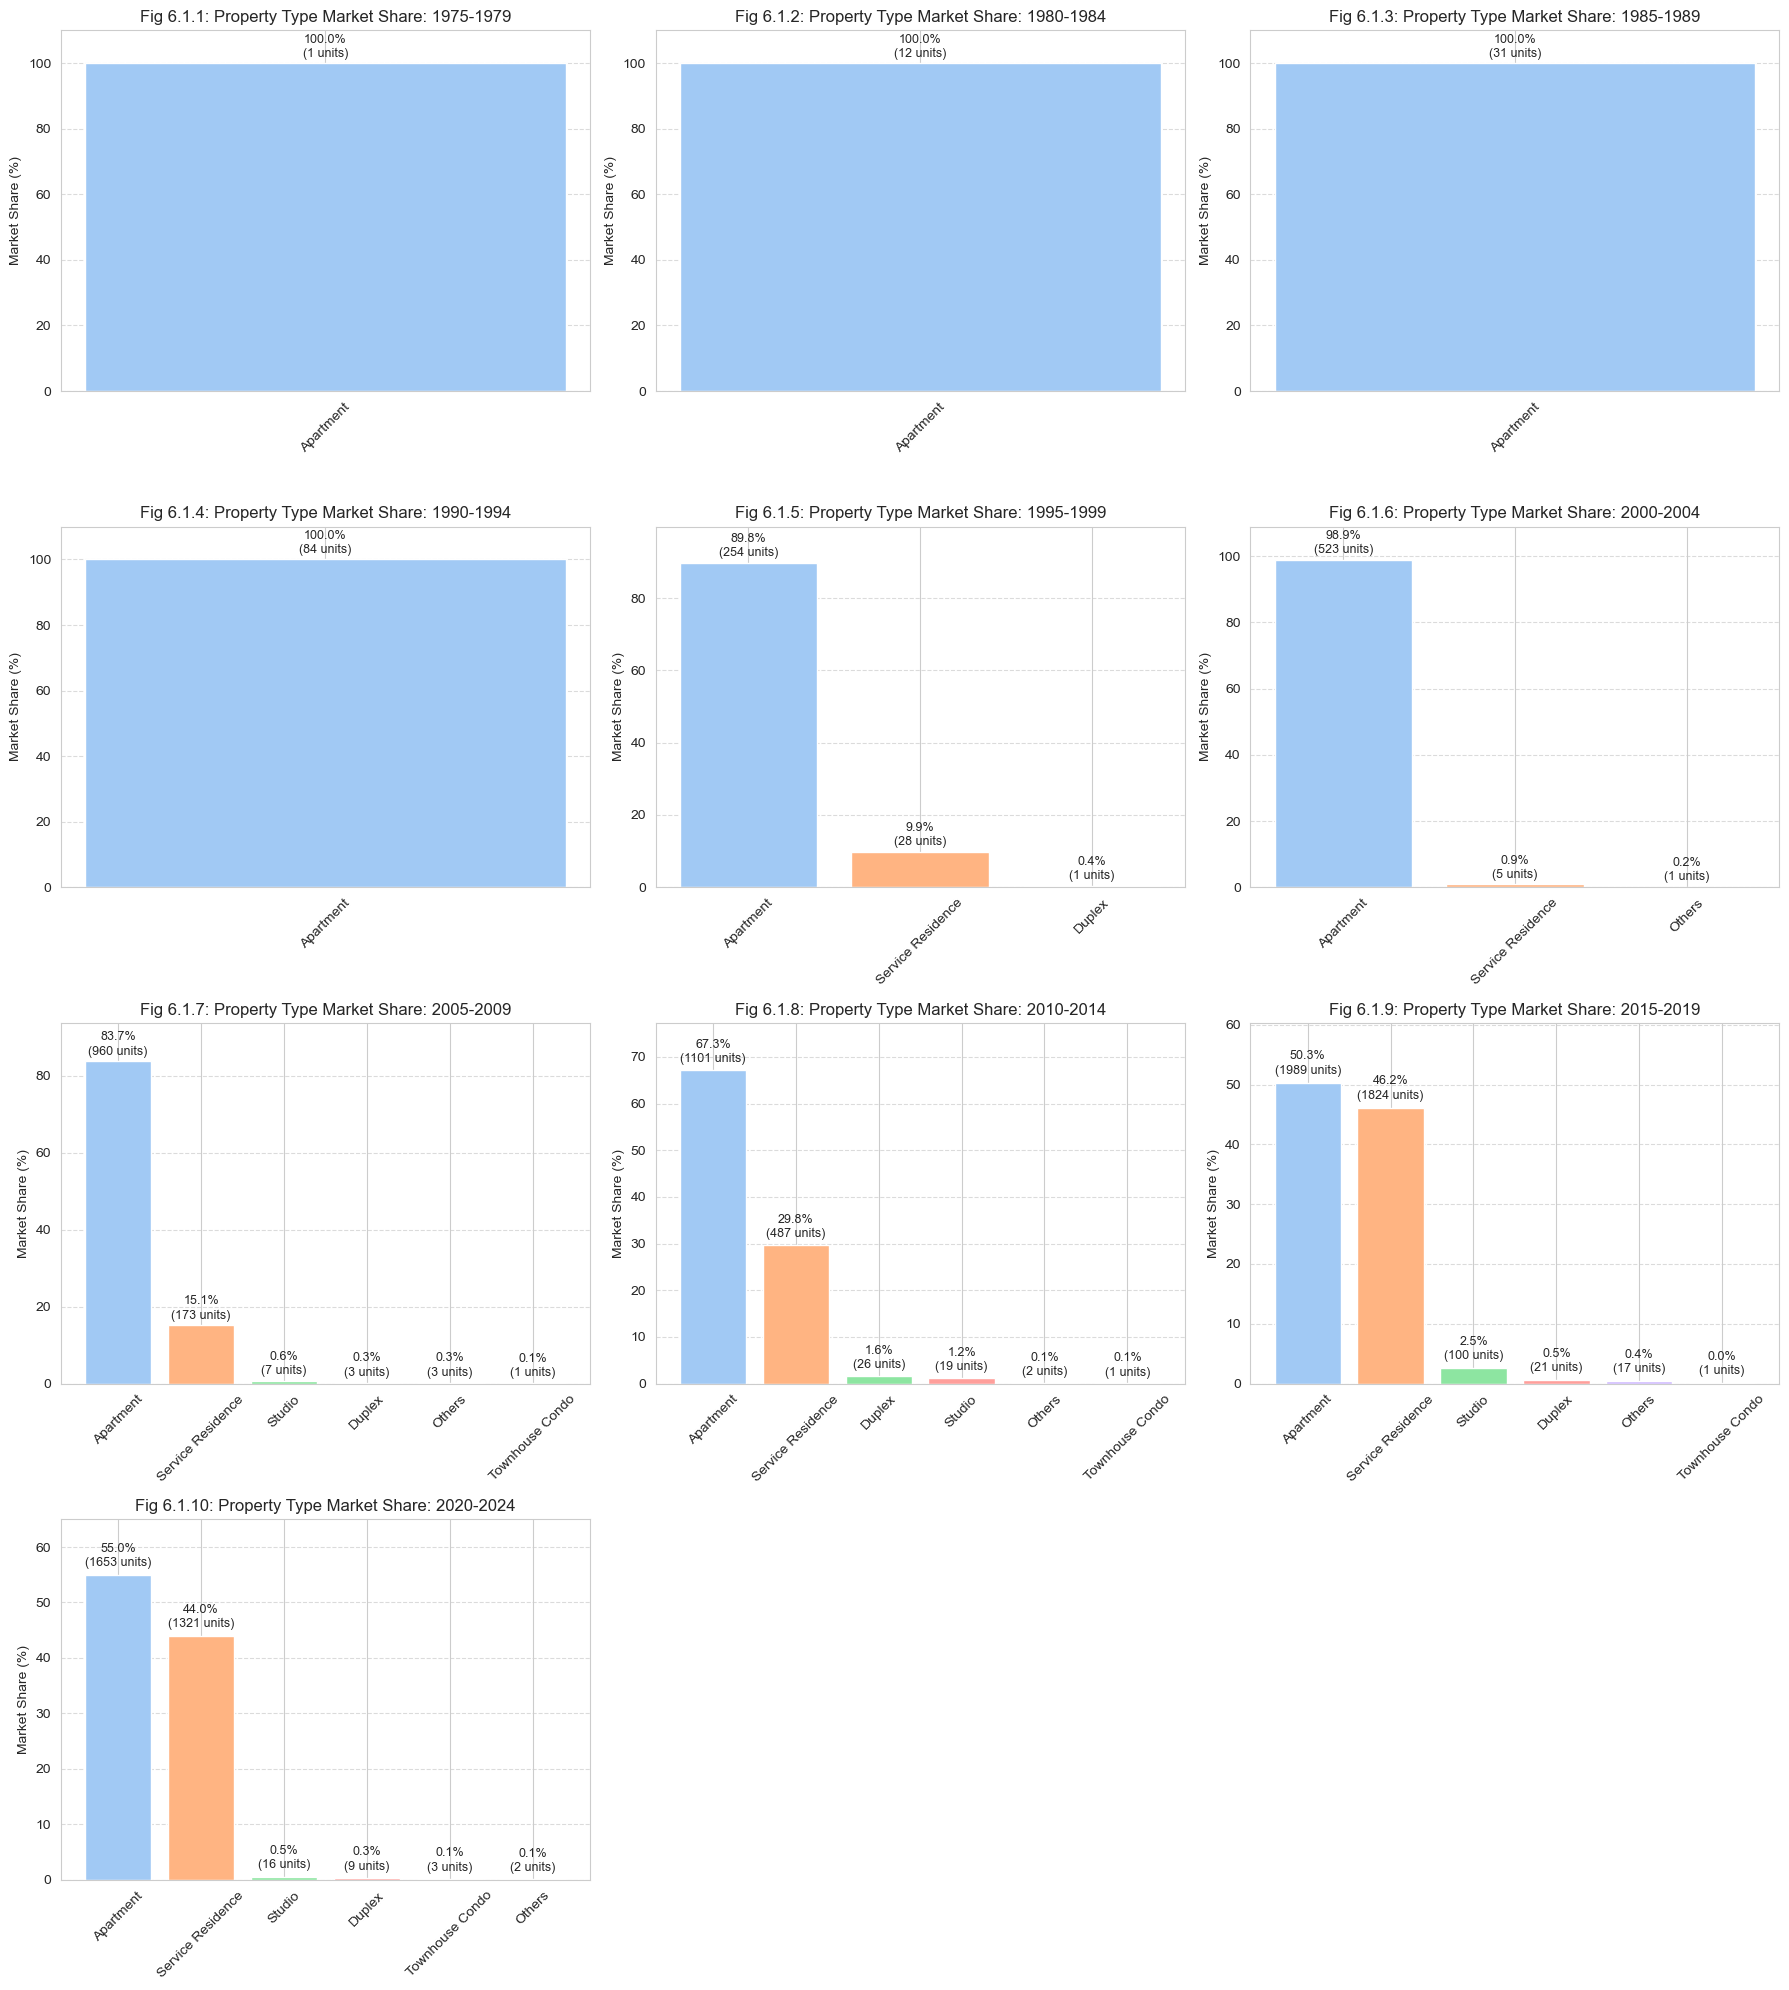

In [169]:
# Filter out incomplete periods (2025 and later)
df = df[df['completion_year'] < 2025].copy()
# Standardize property types - combine Apartment, Condominium, and Flat into a single category
def standardize_property_types(df):
    df = df.copy()
    property_mapping = {
        'Condominium': 'Apartment', 
        'Flat': 'Apartment'
    }
    df['property_type'] = df['property_type'].replace(property_mapping)
    return df
# Standardize the property types
df = standardize_property_types(df)
# Function to create periods from completion years
def create_periods(df, period_size=5):
    df = df.copy()
    df['completion_year'] = pd.to_numeric(df['completion_year'], errors='coerce')
    min_year = int(df['completion_year'].dropna().min())
    max_year = int(df['completion_year'].dropna().max())
    min_year = (min_year // period_size) * period_size
    period_bins = list(range(min_year, max_year + period_size + 1, period_size))
    period_labels = [f"{period_bins[i]}-{period_bins[i+1]-1}" for i in range(len(period_bins)-1)]
    df['period'] = pd.cut(df['completion_year'], bins=period_bins, labels=period_labels, right=False)
    return df, period_labels
# Create 5-year periods in the dataframe
df, period_labels = create_periods(df)
# BAR CHARTS: Market share of each property type for each period
def create_market_share_bar_charts(df, periods):
    # Calculate the number of plots needed
    n_periods = len(periods)
    n_cols = 3  # Adjust based on preference
    n_rows = (n_periods + n_cols - 1) // n_cols
    
    # Create the figure and subplots
    fig = plt.figure(figsize=(18, 5 * n_rows))  # Wider figure to accommodate multiple charts
    gs = gridspec.GridSpec(n_rows, n_cols)
    
    # Generate a bar chart for each period
    for i, period in enumerate(periods):
        # Filter data for the current period
        period_data = df[df['period'] == period]
        
        # Count properties by type
        property_counts = period_data['property_type'].value_counts()
        property_share = property_counts / property_counts.sum() * 100
        
        # Create the bar chart
        ax = plt.subplot(gs[i])
        bars = ax.bar(property_share.index, property_share.values, color=sns.color_palette("pastel"))
        
        # Add percentage and unit count labels above bars
        for bar, count, pct in zip(bars, property_counts.values, property_share.values):
            ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                    f'{pct:.1f}%\n({count} units)', ha='center', va='bottom', fontsize=9)
        
        # Set chart attributes
        ax.set_title(f'Fig 6.1.{i+1}: Property Type Market Share: {period}')
        ax.set_ylabel('Market Share (%)')
        ax.set_ylim(0, max(property_share.values) + 10)
        ax.set_xticks(np.arange(len(property_share.index)))
        ax.set_xticklabels(property_share.index, rotation=45)
        
        # Optional: add gridlines for better readability
        ax.set_axisbelow(True)
        ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

# Create the bar charts
create_market_share_bar_charts(df, period_labels)



Figure 6.2: Median Number of Rooms by Property Type

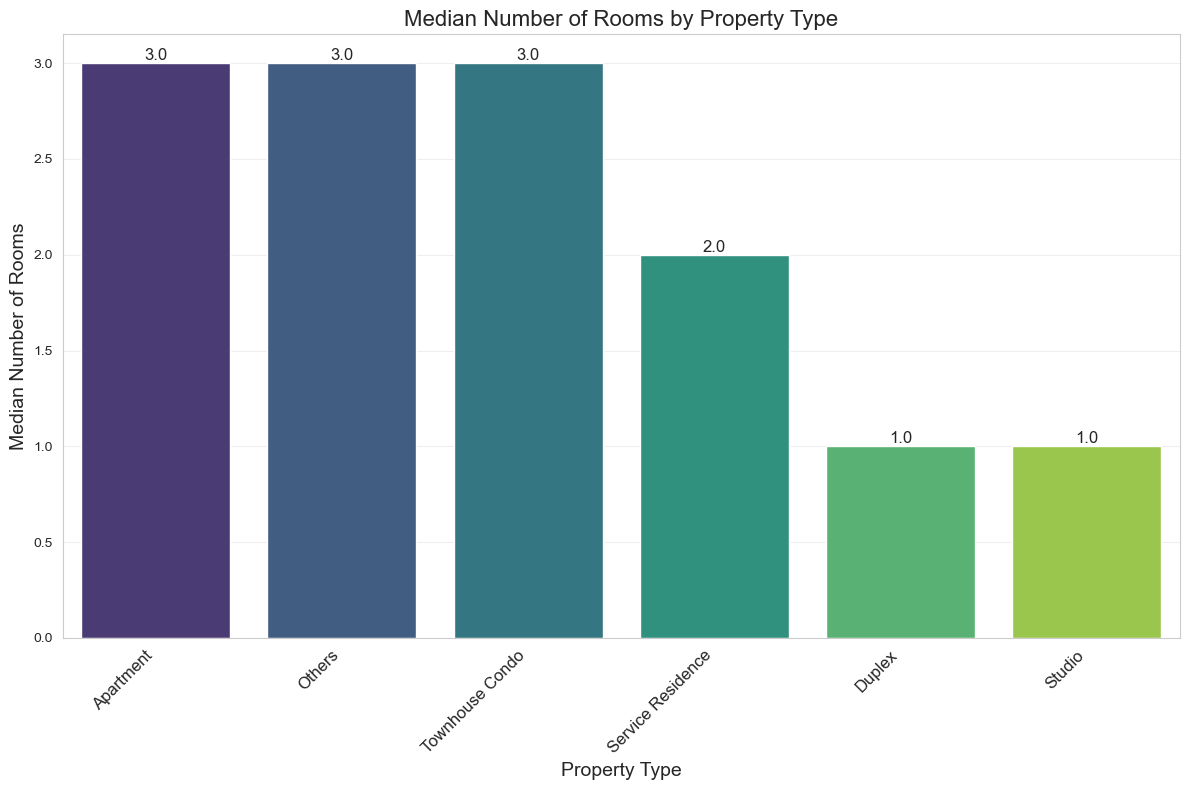

In [171]:
# Clean the data - remove rows with missing values in rooms or property_type columns
df_clean = df.dropna(subset=['rooms', 'property_type'])

# Convert rooms to integer (in case it's stored as float)
df_clean['rooms'] = df_clean['rooms'].astype(int)

# Group by property type and calculate median number of rooms
median_rooms_by_property = df_clean.groupby('property_type')['rooms'].median().reset_index()

# Check for any potential issues with property type names
#print(median_rooms_by_property)  # Inspect the data before plotting

# Handle any potential issues with the 'Others' and 'Studio' categories
# If needed, manually correct labels that might be swapped or incorrect

# Sort by median rooms for better visualization
median_rooms_by_property = median_rooms_by_property.sort_values('rooms', ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=median_rooms_by_property, x='property_type', y='rooms',  hue='property_type', legend=False, palette="viridis" )       

# Add titles and labels
plt.title('Median Number of Rooms by Property Type', fontsize=16)
plt.xlabel('Property Type', fontsize=14)
plt.ylabel('Median Number of Rooms', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add value labels on top of bars
for index, row in enumerate(median_rooms_by_property.itertuples()):
    plt.text(index, row.rooms, f"{row.rooms:.1f}", 
             ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Figure 6.3: Median Rent per Square Meter by Property Type and Period

In [173]:
# Filter out incomplete periods (2025 and later)
df = df[df['completion_year'] < 2025].copy()

# Standardize property types - combine Apartment, Condominium, and Flat into a single category
def standardize_property_types(df):
    df = df.copy()
    # Create a mapping for property types that are used interchangeably
    property_mapping = {
        'Condominium': 'Apartment', 
        'Flat': 'Apartment'
    }
    
    # Apply the mapping to standardize property types
    df['property_type'] = df['property_type'].replace(property_mapping)
    
    return df

# Function to create periods from completion years
def create_periods(df, period_size=5):
    # Make a copy of the dataframe to avoid modifying the original
    df = df.copy()
    
    # Ensure completion_year is numeric and drop NaN values for calculating min/max
    df['completion_year'] = pd.to_numeric(df['completion_year'], errors='coerce')
    
    # Get min and max years (convert to integers)
    min_year = int(df['completion_year'].dropna().min())
    max_year = int(df['completion_year'].dropna().max())
    
    # Round down min_year to nearest multiple of period_size
    min_year = (min_year // period_size) * period_size
    
    # Create period bins
    period_bins = list(range(min_year, max_year + period_size + 1, period_size))
    period_labels = [f"{period_bins[i]}-{period_bins[i+1]-1}" for i in range(len(period_bins)-1)]
    
    # Add period column to dataframe
    df['period'] = pd.cut(df['completion_year'], bins=period_bins, labels=period_labels, right=False)
    
    return df, period_labels

# Function to generate a simple styled table
def create_simple_styled_table(pivot_table, title):
    # Create a DataFrame for the styled table
    styled_df = pd.DataFrame(index=pivot_table.index)
    
    # Add data for each property type
    for col in pivot_table.columns:
        styled_df[col] = pivot_table[col].round(2).astype(str)
    
    # Create the styled table
    styler = styled_df.style.set_caption(title)
    
    return styler

# Standardize the property types
df = standardize_property_types(df)

# Create 5-year periods in the dataframe
df, period_labels = create_periods(df)

# Calculate rent per square meter
df['rent_per_sqm'] = df['monthly_rent'] / df['size']

# Calculate median rent per square meter by property type and period
rent_per_sqm_table = pd.pivot_table(df, 
                                  values='rent_per_sqm',
                                  index='period',
                                  columns='property_type',
                                  aggfunc='median', observed=False)

# Create styled table for median rent per square meter
rent_per_sqm_styled = create_simple_styled_table(rent_per_sqm_table, 
                                               "Median Rent per Square Meter by Property Type and Period")

# Display the styled table
display(rent_per_sqm_styled)



,Apartment,Duplex,Others,Service Residence,Studio,Townhouse Condo
period,,,,,,
1975-1979,1.15,nan,nan,nan,nan,nan
1980-1984,1.3,nan,nan,nan,nan,nan
1985-1989,1.46,nan,nan,nan,nan,nan
1990-1994,1.57,nan,nan,nan,nan,nan
1995-1999,1.4,2.12,nan,2.15,nan,nan
2000-2004,1.39,nan,2.16,2.68,nan,nan
2005-2009,1.48,1.05,1.08,2.22,2.52,1.57
2010-2014,1.58,2.0,3.47,2.19,2.68,1.4
2015-2019,1.78,1.83,1.78,2.11,2.47,1.14


Figure 6.4: Median Rent per Square Meter by Property Type


Median Rent per Square Meter by Property Type
--------------------------------------------------


,Property Type,Median Rent per Square Meter
4,Studio,2.49
3,Service Residence,2.15
1,Duplex,2.07
2,Others,1.73
0,Apartment,1.64
5,Townhouse Condo,1.49


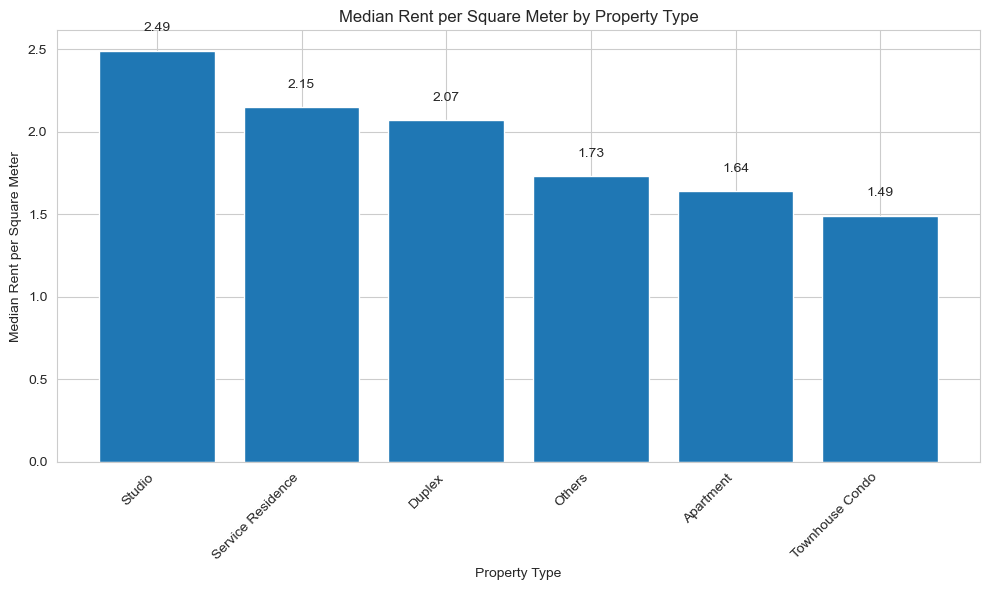

Analysis complete.


In [175]:
# Standardize property types - combine Apartment, Condominium, and Flat into a single category
def standardize_property_types(df):
    df = df.copy()
    # Create a mapping for property types that are used interchangeably
    property_mapping = {
        'Condominium': 'Apartment', 
        'Flat': 'Apartment'
    }
    
    # Apply the mapping to standardize property types
    df['property_type'] = df['property_type'].replace(property_mapping)
    
    return df

# Standardize the property types
df = standardize_property_types(df)

# Calculate rent per square meter
df['rent_per_sqm'] = df['monthly_rent'] / df['size']

# Calculate median rent per square meter by property type only
rent_per_sqm_by_type = df.groupby('property_type')['rent_per_sqm'].median().reset_index()

# Sort by median rent per sqm in descending order
rent_per_sqm_by_type = rent_per_sqm_by_type.sort_values('rent_per_sqm', ascending=False)

# Round to 2 decimal places for display
rent_per_sqm_by_type['rent_per_sqm'] = rent_per_sqm_by_type['rent_per_sqm'].round(2)

# Create a prettier display table
pretty_table = pd.DataFrame({
    'Property Type': rent_per_sqm_by_type['property_type'],
    'Median Rent per Square Meter': rent_per_sqm_by_type['rent_per_sqm']
})

# Display the table
print("Median Rent per Square Meter by Property Type")
print("-" * 50)
display(pretty_table)

# Optional: Create a bar chart visualization
plt.figure(figsize=(10, 6))
bars = plt.bar(rent_per_sqm_by_type['property_type'], rent_per_sqm_by_type['rent_per_sqm'])

# Add data labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}',
             ha='center', va='bottom', fontsize=10)

plt.title('Median Rent per Square Meter by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Median Rent per Square Meter')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# You can also save this table to Excel
with pd.ExcelWriter('rent_per_sqm_by_type.xlsx') as writer:
    pretty_table.to_excel(writer, sheet_name='Rent per SqM', index=False)

print("Analysis complete.")

Figure 6.5: Market Share across all time periods (collated together)

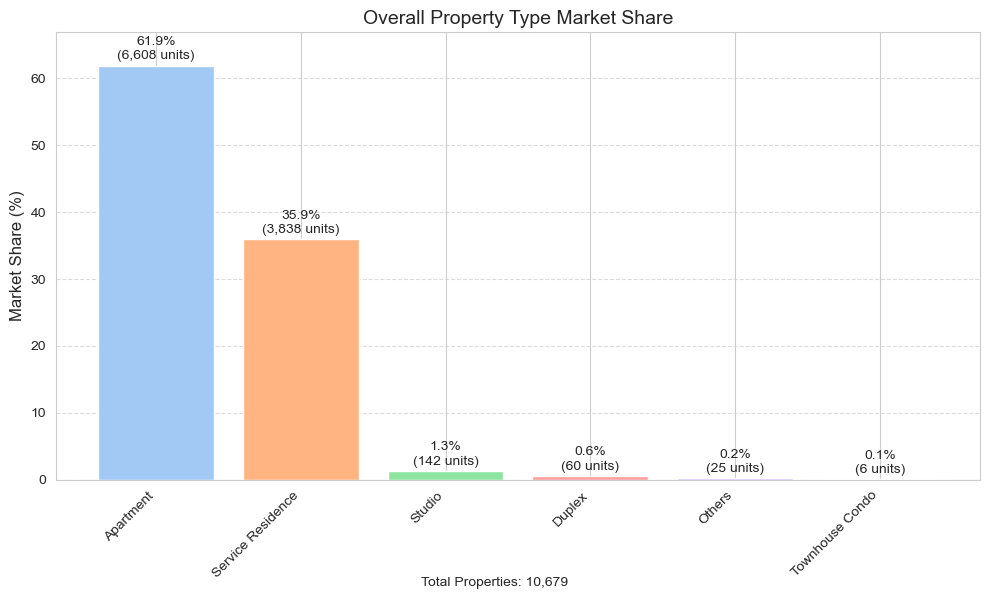

In [177]:

# Filter out incomplete periods (2025 and later)
df = df[df['completion_year'] < 2025].copy()

# Standardize property types - combine Apartment, Condominium, and Flat into a single category
def standardize_property_types(df):
    df = df.copy()
    property_mapping = {
        'Condominium': 'Apartment', 
        'Flat': 'Apartment'
    }
    df['property_type'] = df['property_type'].replace(property_mapping)
    return df

# Standardize the property types
df = standardize_property_types(df)

# Create a simple market share graph for all properties combined
def create_overall_market_share_graph(df):
    # Get the count of each property type
    property_counts = df['property_type'].value_counts()
    
    # Calculate the market share percentages
    total_properties = property_counts.sum()
    property_shares = property_counts / total_properties * 100
    
    # Sort from highest to lowest share
    property_shares = property_shares.sort_values(ascending=False)
    
    # Create the figure
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create bars
    bars = ax.bar(property_shares.index, property_shares.values, 
                  color=sns.color_palette("pastel", len(property_shares)))
    
    # Add percentage and count labels above each bar
    for bar, count, pct in zip(bars, property_counts[property_shares.index], property_shares):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                f'{pct:.1f}%\n({count:,} units)', ha='center', va='bottom', fontsize=10)
    
    # Set chart attributes
    ax.set_title('Overall Property Type Market Share', fontsize=14)
    ax.set_ylabel('Market Share (%)', fontsize=12)
    ax.set_ylim(0, property_shares.max() + 5)  # Add space for labels
    
    # Rotate x-axis labels if needed for better readability
    plt.xticks(rotation=45 if len(property_shares) > 5 else 0, ha='right' if len(property_shares) > 5 else 'center')
    
    # Add gridlines for better readability
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)
    
    # Add total count as a subtitle
    plt.figtext(0.5, 0.01, f'Total Properties: {total_properties:,}', 
                ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()

# Generate the overall market share graph
create_overall_market_share_graph(df)

Figure 6.6 Median Property Size by Property Type

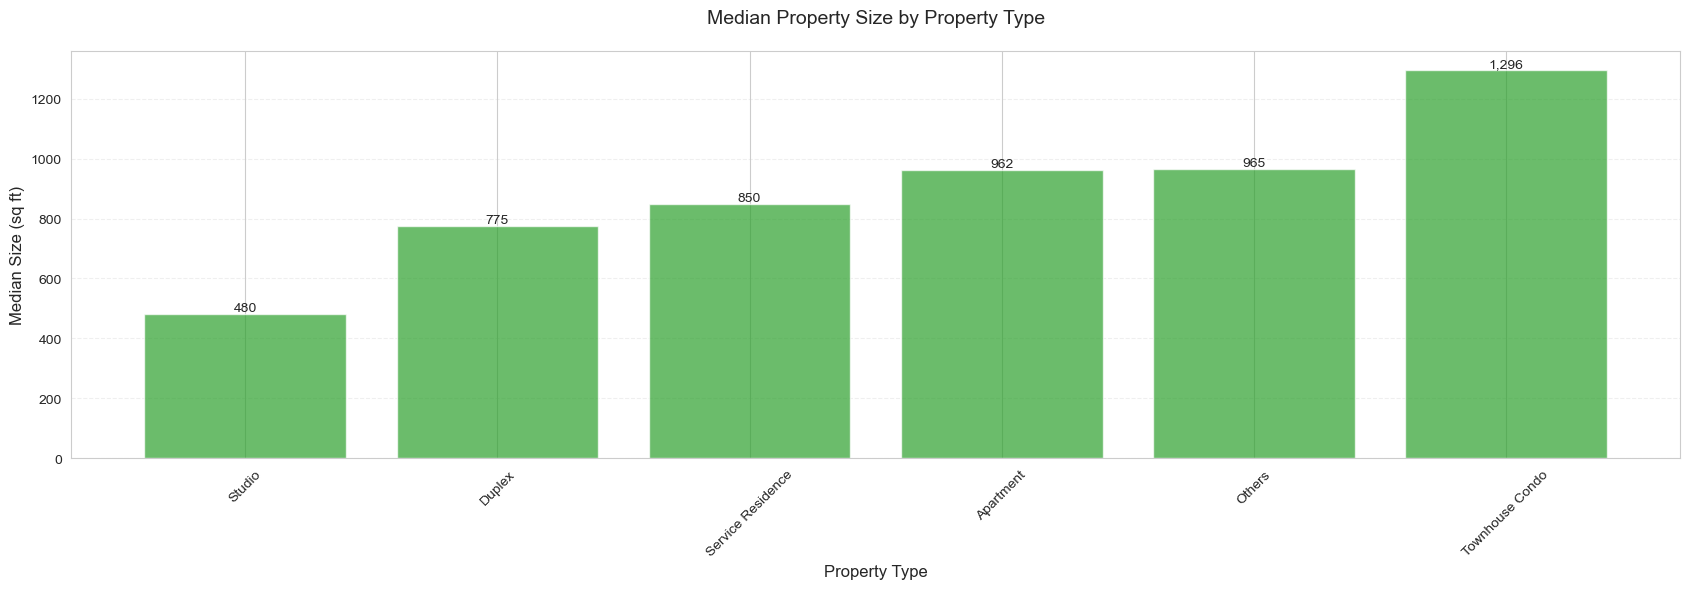

In [179]:

# Create a copy of the dataframe to avoid modifying the original
df_processed = df.copy()

# Strip spaces from both ends of property_type
df_processed['property_type'] = df_processed['property_type'].str.strip()

# Combine "Condominium", "Flat", and "Apartment" into a single category
df_processed['property_type'] = df_processed['property_type'].replace(
    ['Condominium', 'Flat', 'Apartment'], 
    'Apartment'
)

# Drop rows with missing values in 'property_type' or 'size'
df_clean = df_processed.dropna(subset=['property_type', 'size'])

# Calculate MEDIAN property size by property type (sorted)
median_size_by_type = df_clean.groupby('property_type')['size'].median().sort_values()

# Plot a bar chart (better for median comparisons)
plt.figure(figsize=(17, 6))
bars = plt.bar(median_size_by_type.index, median_size_by_type.values, 
               color='#2ca02c',  # Green for median
               alpha=0.7)

# Customize the plot
plt.title('Median Property Size by Property Type', fontsize=14, pad=20)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Median Size (sq ft)', fontsize=12)
plt.xticks(rotation=45)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:,.0f}', 
             ha='center', 
             va='bottom',
             fontsize=10)

# Style adjustments
plt.grid(True, linestyle='--', alpha=0.3, axis='y')
plt.tight_layout()

# Show the plot
plt.show()



## Data Analysis:


* Standardize property types - combine Apartment, Condominium, and Flat into a single category.
* Apartment , condominium , and flats are considered to be the same

Profitability is based on median rents per square metre.


- Figure 6.1 shows changes in market share of types of properties, which we use to determine changes in market preferences over the years.

- Figure 6.2 shows overall market share of all types of properties regardless of year of construction, which provides an overview of the market share of each type of residential property.

- Figure 6.3 shows the median room number of each type of property, which our investor uses to assess the dominant room configuration in the market.

- Figure 6.4 shows the median rent per square metre of properties completed from 2020 to 2024

- Figure 6.5 shows the median rent per square metre of properties across all time periods
- Figure 6.6 shows the median property size by property type, which our investor uses to assess the dominant house sizes in the market

- According to figure 6.1.1 to figure 6.1.10, residential properties, especially apartments, have consistently dominated the market from year 1975 to year 2024.
- The data above is corroborated by overall market share in figure 6.2

According to Figure 6.3, the median room number in Apartment, Townhouse condo, Service Residence, Duplex, Studio are 3,3,2,1,1 respectively. 

The most profitable property types for properties completed from  2020 to 2024 according to Figure 6.4 is as follows:

1) Studio (3.13) <br>
2) Duplex (2.39) <br>
3) Service Residence (2.18) <br>

The most profitable property types across all time periods according to Figure 6.5 is as follows:
1) Studio (2.49) <br>
2) Service Residence (2.15) <br>
3) Duplex (2.07) <br>

According to Figure 6.6, the median property size in different property types are:
- Studio at 480 square feet <br>
- Duplex at 775 square feet <br>
- Service Residence at 850 square feet <br>
- Apartments at 962 square feet <br>
- Townhouse Condo at 1296 square feet <br>



## Conclusion

Newly built studios and duplexes fetch a significant premium over older units according to Figure 6.3. This points to a consumer preference for new builds that is not present for service residence.

Caution should be exercised when investing in studios or duplexes since their rental yield drops significantly once consumers consider these properties to be “old”. The purchase price of these units should account for rapid depreciation in rental yields relative to other types of properties.

Since rental yields are an important barometer of property resale values, duplexes and studios may experience lower capital appreciation relative to other property types. This may be caused by its inflated purchase price that developers may try to justify with its high rental yields for the first 5 years. 

- According to figure 6.1.1 to figure 6.1.10, apartments have consistently dominated the market across all time periods
- Apartments has the highest market share across all property types
- Serviced residence's share of the market has grown overtime, reflecting their increasing popularity among city dwellers, which may prove to be a good investment given their relatively high rent per square meter.
- Studios and duplex have high rental yields but low market share, which may cause take up to be low, impacting actual rental returns.
- Service residence are ideal investments with high, and growing market share that is complemented by high rental returns.


## Question: What facilities and additional facilities are most desirable to renters based on their association with higher rental prices?

**Name**: Kee Yang / Joyceline<br>
**Variables used**: `facilities`, `additional_facilities`, `monthly_rent`<br>
**Graph used**: Horizontal bar graph

Figure 7.1: Top Facilities by Associated Average Rent

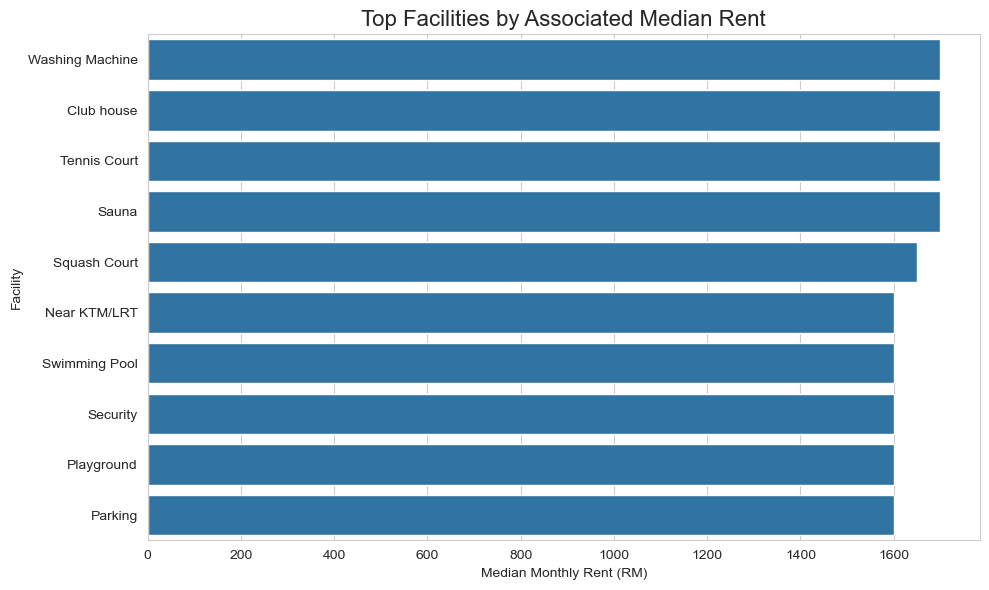

In [183]:


# Select only the relevant columns and drop rows with missing values
df_fac = df[['monthly_rent', 'facilities', 'additional_facilities']].dropna()

# Combine 'facilities' and 'additional_facilities' into one column
# This allows us to analyze all features together
df_fac['all_facilities'] = df_fac['facilities'] + ',' + df_fac['additional_facilities']

# Split the combined string into individual facility items
# Use explode to turn each list into multiple rows
facility_rows = df_fac.assign(facility=df_fac['all_facilities'].str.split(',')).explode('facility')

# Remove leading/trailing whitespace from each facility
facility_rows['facility'] = facility_rows['facility'].str.strip()

# Remove invalid entries: empty strings and purely numeric values (e.g. "2", "3")
facility_rows = facility_rows[facility_rows['facility'].str.len() > 0]
facility_rows = facility_rows[~facility_rows['facility'].str.isnumeric()]

# Group by each unique facility and calculate the average rent for listings that include it
facility_avg_rent = facility_rows.groupby('facility')['monthly_rent'].median().sort_values(ascending=False)

# Select the top 10 facilities associated with the highest average rent
top_facilities = facility_avg_rent.head(10)

# Plot the results as a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_facilities.values, y=top_facilities.index)

# Add chart titles and labels
plt.title("Top Facilities by Associated Median Rent", fontsize=16)
plt.xlabel("Median Monthly Rent (RM)")
plt.ylabel("Facility")

# Adjust layout for readability
plt.tight_layout()
plt.show()

Figure 7.2: Top 10 Facilities With vs Without Labelled Facility

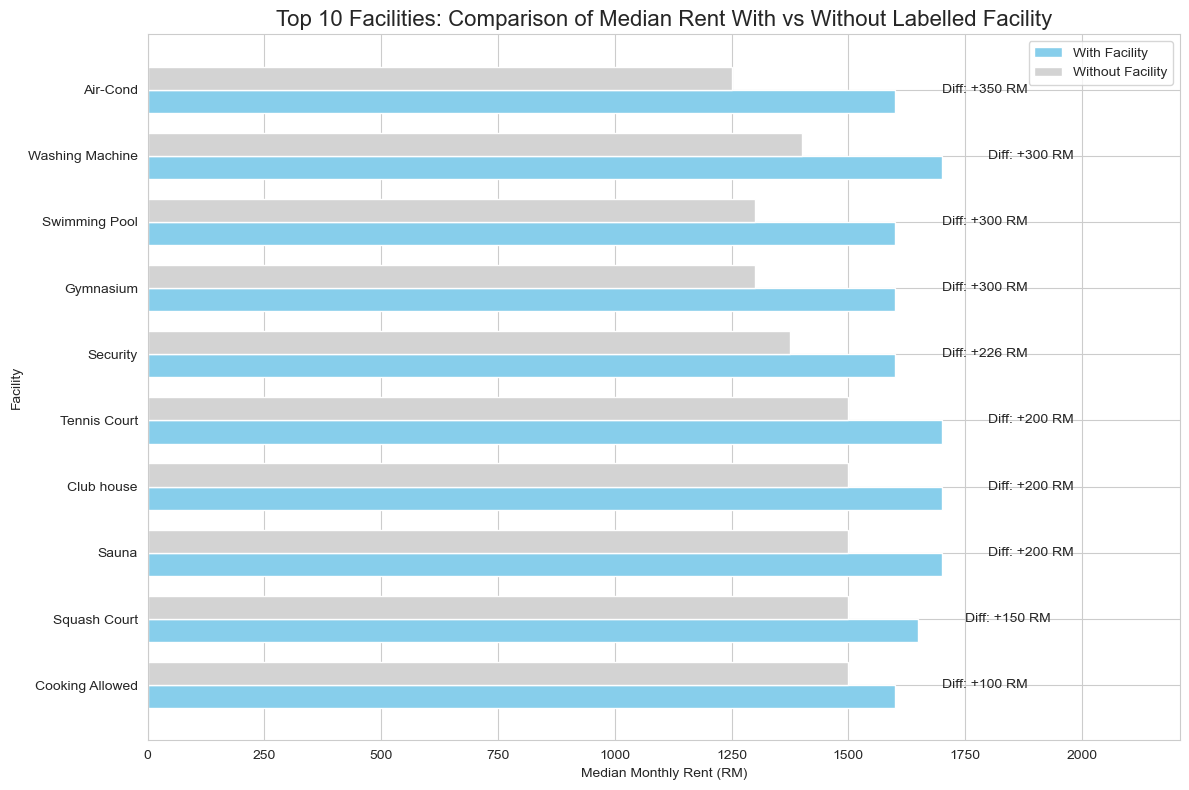

In [185]:


# Select only the relevant columns and drop rows with missing values
df_fac = df[['monthly_rent', 'facilities', 'additional_facilities']].dropna()

# Combine 'facilities' and 'additional_facilities' into one column
df_fac['all_facilities'] = df_fac['facilities'] + ',' + df_fac['additional_facilities']

# Create a function to check if a specific facility exists in a property
def has_facility(facilities_str, facility):
    facilities_list = [f.strip() for f in facilities_str.split(',')]
    return facility in facilities_list

# Get a list of all unique facilities
all_facilities = []
for facilities_str in df_fac['all_facilities']:
    facilities_list = [f.strip() for f in facilities_str.split(',') if f.strip() and not f.strip().isnumeric()]
    all_facilities.extend(facilities_list)
unique_facilities = sorted(list(set(all_facilities)))

# Calculate median rent for properties with and without each facility
results = []
for facility in unique_facilities:
    # Create a mask for properties with this facility
    has_fac = df_fac['all_facilities'].apply(lambda x: has_facility(x, facility))
    
    # Calculate median rent for properties with this facility
    avg_with = df_fac[has_fac]['monthly_rent'].median()
    
    # Calculate median rent for properties without this facility
    avg_without = df_fac[~has_fac]['monthly_rent'].median()
    
    # Store the results along with the count of properties with this facility
    count = sum(has_fac)
    results.append({
        'facility': facility,
        'avg_with': avg_with,
        'avg_without': avg_without,
        'difference': avg_with - avg_without,
        'count': count
    })

# Convert to DataFrame and sort by the difference in median rent (descending)
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('difference', ascending=False)

# Filter to facilities that appear in at least 10 properties to ensure statistical relevance
results_df = results_df[results_df['count'] >= 10]

# Select top 10 facilities with the highest rent difference
top_facilities = results_df.head(10)

# IMPORTANT: Reorder the facilities from largest to smallest difference for the chart
# (This ensures the facility with the largest difference appears at the top of the chart)
top_facilities = top_facilities.sort_values('difference', ascending=True)

# Plot the results as a horizontal bar chart comparing with vs without
plt.figure(figsize=(12, 8))

# Set the bar width and positions
bar_width = 0.35
y_pos = np.arange(len(top_facilities))

# Create the bars
plt.barh(y_pos - bar_width/2, top_facilities['avg_with'], bar_width, 
         label='With Facility', color='skyblue')
plt.barh(y_pos + bar_width/2, top_facilities['avg_without'], bar_width, 
         label='Without Facility', color='lightgray')

# Add labels and title
plt.yticks(y_pos, top_facilities['facility'])
plt.xlabel('Median Monthly Rent (RM)')
plt.ylabel('Facility')
plt.title('Top 10 Facilities: Comparison of Median Rent With vs Without Labelled Facility', fontsize=16)
plt.legend()

# Add text annotations showing the rent difference
for i, (_, row) in enumerate(top_facilities.iterrows()):
    plt.text(max(row['avg_with'], row['avg_without']) + 100, i, 
             f"Diff: +{row['difference']:.0f} RM", 
             va='center')

# Add padding to the right side of the x-axis
# Get current x limits
x_min, x_max = plt.xlim()
# Find the maximum values to ensure annotations are visible
max_values = [max(row['avg_with'], row['avg_without']) for _, row in top_facilities.iterrows()]
highest_value = max(max_values)
# Calculate how much padding to add (e.g., 30% more than the highest value)
padding = 0.3 * highest_value  # Adjust this multiplier for more or less padding
# Set new x limits with extra padding on the right
plt.xlim(x_min, highest_value + padding)

plt.tight_layout()
plt.show()





### Data Analysis
- According to Figure 7.1, the facilities that are associated with the highest median rents are Washing Machine, Barbeque area, Tennis court
- According to Figure 7.2, the facilities that cause the highest increases in median rent compared to housing without these facilities are Security, Swimming Pool, and Air Con
- This discrepancy may be caused by different methodologies used in the calculation of these two figures. Figure 7.1 listed the facilities included in the housing with the highest median rents. It does not mean that adding a Washing Machine will necessarily give us the highest increase in rental income. 
- We address this issue in Figure 7.2 by comparing the median rents of housing with and without a specific facility. This allows our client to quanitfy the facilities that give the highest return on investment.
- An air-cond netts an increase of RM350 in median rents. It would take approximately 4 months for the air-con to pay for itself if we assume the Air-cond is priced at the market price of RM1400.
- The foremost concern of renters is Security
- They also prioritise sports and recreational facilities like Swimming Pools and Gymnasium (Top 2 and Top 5 respectively)
- Facilities that improve their lifestyle and living standards like Air-Con and Washing Machine are also important for renters. (Top 3 and Top 4 respectively)

### Conclusion
The data shows that sports and recreational facilities (Swimming Pool, Gymnasium), and convenience-oriented amenities (Washing Machine, Air-Cond) are linked to higher rent values.
This suggests that renters are willing to pay a premium for properties that offer personal comfort and lifestyle enhancements.

Developers and landlords aiming to attract high-paying tenants should consider investing in these value-adding features — particularly if targeting expats, professionals, or upper-middle-income renters.



## Predictive modelling

Figure 8.1 Polynomial model (Degree=3) of Number of Properties Completed by Year vs Completion Year

Training data: 29 samples (78.4%)
Testing data: 8 samples (21.6%)

Degree 3 polynomial:
  Training R²: 0.9257, MSE: 8559.12
  Testing R²: 0.9351, MSE: 6839.86

Best model: Degree 3 polynomial


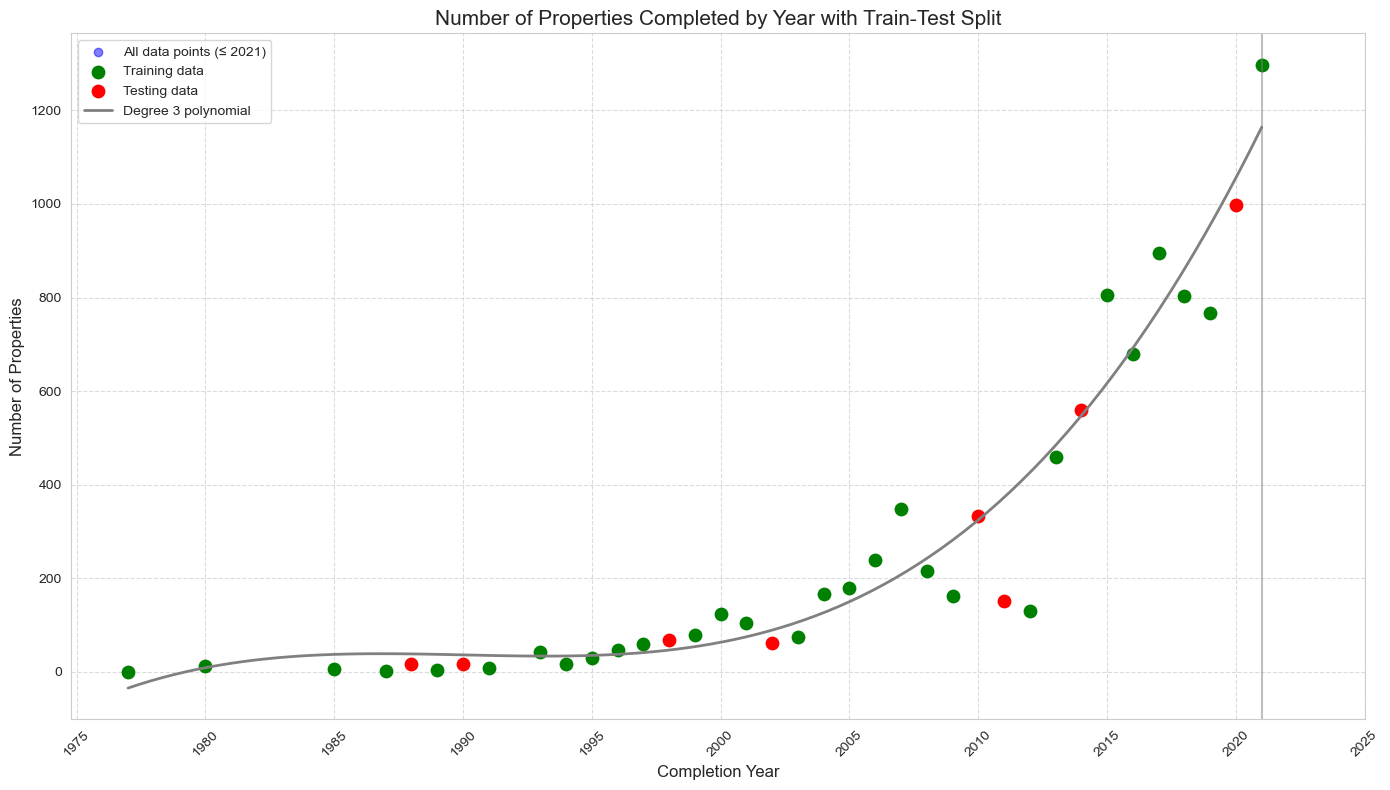


Best model (Degree 3) overall performance:
  R²: 0.9276
  MSE: 8187.39


In [189]:
# Group by completion_year and count the number of properties
property_counts = df.groupby('completion_year').size().reset_index(name='count')

# Filter out years after 2021
filtered_counts = property_counts[property_counts['completion_year'] <= 2021]

# Prepare data for modeling
X = filtered_counts['completion_year'].values.reshape(-1, 1)
y = filtered_counts['count'].values

# Create train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {len(X_train)} samples ({len(X_train)/len(X)*100:.1f}%)")
print(f"Testing data: {len(X_test)} samples ({len(X_test)/len(X)*100:.1f}%)")

# Create and fit polynomial regression models with different degrees
degrees = [3]  
models = {}
train_predictions = {}
test_predictions = {}
poly_transformers = {}

# Train models with different polynomial degrees
for degree in degrees:
    # Create polynomial features transformer
    poly_transformer = PolynomialFeatures(degree=degree)
    
    # Transform training data
    X_train_poly = poly_transformer.fit_transform(X_train)
    
    # Transform test data
    X_test_poly = poly_transformer.transform(X_test)
    
    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    # Store transformer and model
    poly_transformers[degree] = poly_transformer
    models[degree] = model
    
    # Make predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    # Store predictions
    train_predictions[degree] = y_train_pred
    test_predictions[degree] = y_test_pred
    
    # Calculate performance metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    print(f"\nDegree {degree} polynomial:")
    print(f"  Training R²: {train_r2:.4f}, MSE: {train_mse:.2f}")
    print(f"  Testing R²: {test_r2:.4f}, MSE: {test_mse:.2f}")

# Find best model based on test R²
best_degree = max(degrees, key=lambda d: r2_score(y_test, test_predictions[d]))
print(f"\nBest model: Degree {best_degree} polynomial")

# Generate points for smooth curves across all years
all_years = np.sort(np.unique(X))
X_plot = np.linspace(all_years.min(), all_years.max(), 100).reshape(-1, 1)

# Create the plot
plt.figure(figsize=(14, 8))

# Plot all original data points
plt.scatter(X, y, color='blue', alpha=0.5, label='All data points (≤ 2021)')

# Mark training points
plt.scatter(X_train, y_train, color='green', s=80, label='Training data')

# Mark testing points
plt.scatter(X_test, y_test, color='red', s=80, label='Testing data')

# Plot polynomial curves for each degree
colors = ['gray', 'orange', 'purple']
for i, degree in enumerate(degrees):
    # Transform plot points
    X_plot_poly = poly_transformers[degree].transform(X_plot)
    
    # Make predictions
    y_plot_pred = models[degree].predict(X_plot_poly)
    
    # Plot the curve
    plt.plot(X_plot, y_plot_pred, color=colors[i], linewidth=2,
             label=f'Degree {degree} polynomial')

# Add vertical line at 2021
plt.axvline(x=2021, color='gray', linestyle='-', alpha=0.5)

# Add labels and title
plt.title('Number of Properties Completed by Year with Train-Test Split', fontsize=15)
plt.xlabel('Completion Year', fontsize=12)
plt.ylabel('Number of Properties', fontsize=12)

# Set x-axis ticks every 5 years
min_year = all_years.min()
max_year = all_years.max()
start_year = min_year - (min_year % 5)
end_year = max_year + (5 - max_year % 5) if max_year % 5 else max_year
five_year_ticks = np.arange(start_year, end_year + 1, 5)
plt.xticks(five_year_ticks, rotation=45)

# Enhance the grid
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend()
plt.tight_layout()
plt.show()

# Generate predictions for all data points using the best model
best_transformer = poly_transformers[best_degree]
best_model = models[best_degree]

X_all_poly = best_transformer.transform(X)
y_all_pred = best_model.predict(X_all_poly)

# Calculate overall performance metrics for the best model
overall_r2 = r2_score(y, y_all_pred)
overall_mse = mean_squared_error(y, y_all_pred)

print(f"\nBest model (Degree {best_degree}) overall performance:")
print(f"  R²: {overall_r2:.4f}")
print(f"  MSE: {overall_mse:.2f}")


## Data Analysis:
- We used a polynomial model in Figure 8.1 to predict the future growth of the number of homes completed based on the current data.
- 80% of data was used for training and 20% of data was used to validate the model.
- The best polynomial model was degree 3 with a R^2 value of 0.9293. This shows that the polynomial model is a strong fit for historical home completion data.
- The polynomial model is used to predict future trends for the number of houses completed in the future, which helps inform house buying decisions by our investor.

## Conclusion: 
- Based on the trends observed in our polynomial model, we believe that the number of homes completed will continue to grow in the future. Continued growth shows that investors have confidence in the continued strength and resilience of housing as a safe investment and store of value, which means that capital appreciation of homes is likely. 

Figure 8.2 Polynomial Model predictinig Median Rent per Square Feet vs Completion Year

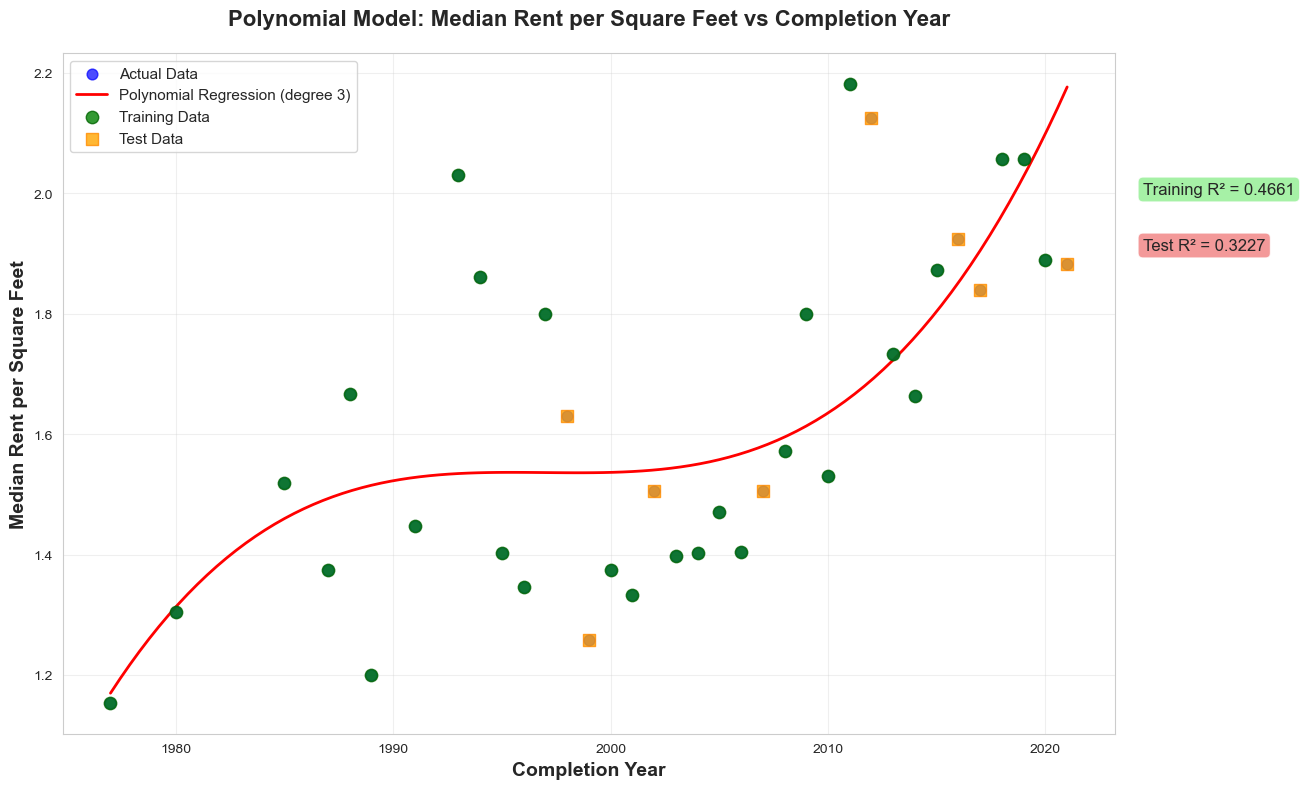

In [192]:
# Load the data
df = pd.read_csv('malaysia_house_rental_price_data.csv')
# Calculate rent per square feet
df['rent_per_sqft'] = df['monthly_rent'] / df['size']
# Filter out completion years above 2021
df_filtered = df[df['completion_year'] <= 2021].copy()
# Remove any rows with NaN values in the required columns
df_filtered = df_filtered.dropna(subset=['rent_per_sqft', 'completion_year'])
# Group by completion year and calculate median rent per square feet
yearly_median = df_filtered.groupby('completion_year')['rent_per_sqft'].median().reset_index()
yearly_median.columns = ['completion_year', 'median_rent_per_sqft']
# Filter out median rent per square feet below 1.1
yearly_median = yearly_median[yearly_median['median_rent_per_sqft'] >= 1.1].copy()
# Prepare data for modeling
X = yearly_median['completion_year'].values.reshape(-1, 1)
y = yearly_median['median_rent_per_sqft'].values
# Split data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create polynomial model (trying degree 2 first, can be adjusted)
degree = 3
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
# Fit the model
poly_model.fit(X_train, y_train)
# Make predictions
y_train_pred = poly_model.predict(X_train)
y_test_pred = poly_model.predict(X_test)
# Calculate R² scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
# Generate smooth curve for plotting
X_plot = np.linspace(yearly_median['completion_year'].min(), 
                     yearly_median['completion_year'].max(), 100).reshape(-1, 1)
y_plot_pred = poly_model.predict(X_plot)

# Create the plot with extra space for text
fig, ax = plt.subplots(figsize=(14, 8))  # Made figure wider

ax.scatter(yearly_median['completion_year'], yearly_median['median_rent_per_sqft'], 
           color='blue', alpha=0.7, s=60, label='Actual Data', zorder=3)
# Plot the polynomial regression line
ax.plot(X_plot, y_plot_pred, color='red', linewidth=2, 
         label=f'Polynomial Regression (degree {degree})', zorder=2)
# Highlight training and test points
ax.scatter(X_train, y_train, color='green', alpha=0.8, s=80, 
           label='Training Data', marker='o', edgecolor='darkgreen', zorder=4)
ax.scatter(X_test, y_test, color='orange', alpha=0.8, s=80, 
           label='Test Data', marker='s', edgecolor='darkorange', zorder=4)

# Position text boxes to the right of the plot area
# Using figure coordinates (0,0 is bottom-left, 1,1 is top-right of entire figure)
fig.text(0.82, 0.75, f'Training R² = {r2_train:.4f}', 
         fontsize=12, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
fig.text(0.82, 0.68, f'Test R² = {r2_test:.4f}', 
         fontsize=12, bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8))

# Customize the plot
ax.set_xlabel('Completion Year', fontsize=14, fontweight='bold')
ax.set_ylabel('Median Rent per Square Feet', fontsize=14, fontweight='bold')
ax.set_title('Polynomial Model: Median Rent per Square Feet vs Completion Year', 
          fontsize=16, fontweight='bold', pad=20)
ax.legend(fontsize=11, loc='upper left')  # Moved legend to avoid overlap
ax.grid(True, alpha=0.3)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.subplots_adjust(right=0.8)  # Leave space on the right for text boxes
plt.show()


## Data Analysis 
- We used a polynomial model in Figure 8.2 to predict median rent per square feet based on current data
- 80% of data was used for training and 20% of data was used for testing
- The best polynomial model was degree 3 with R^2 value of 0.4661. There is considerable random deviation from the predicted value.
- Variations may be caused by cyclical economic trends like financial crises, changes in birth rates that impact demand in a particular year, tenancy agreement renewals, and etc. 
- The model shows the general trend of increasing median rent per square feet as building age decreases, possibly due to capital appreciation of land values and more modern facilities that are present in these houses.


# Conclusion
- Based on the trends observed in our polynomial model, we believe that rental yields will continue to grow at a steady rate in the future. 


Figure 8.3 Precision of KNN algorithm (K value = 3) for predicting Property Type

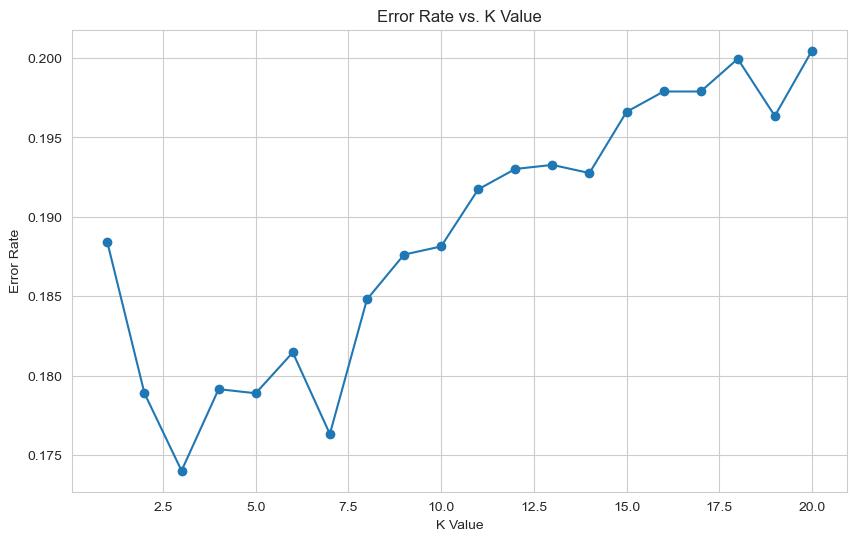

Optimal K value: 3

=== CLASSIFICATION REPORT ===
                   precision    recall  f1-score   support

        Apartment       0.88      0.89      0.88      2842
Service Residence       0.69      0.66      0.67      1054

         accuracy                           0.83      3896
        macro avg       0.78      0.77      0.78      3896
     weighted avg       0.82      0.83      0.82      3896


=== CONFUSION MATRIX ===
[[2524  318]
 [ 360  694]]

=== PRECISION BY CATEGORY ===
Service Residence: 0.686
Apartment: 0.875

Prediction for property with 3 rooms, 962 sqft, RM1580/month:
Predicted type: Apartment
Confidence scores:
  Apartment: 1.000
  Service Residence: 0.000


In [195]:
# Data preprocessing function
def preprocess_property_data(df):
    """
    Clean and prepare the property data for KNN modeling
    """
    # Remove leading/trailing spaces from all string columns
    df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
    
    # Standardize property type categories
    property_mapping = {
        'Condominium': 'Apartment',
        'Apartment': 'Apartment', 
        'Flat': 'Apartment',
        'Studio': 'Studio',
        'Service Residence': 'Service Residence',
        'Serviced Residence': 'Service Residence'  # Handle variations
    }
    
    # Apply mapping and clean property_type
    df['property_type'] = df['property_type'].str.strip().map(property_mapping)
    
    # Calculate rent per square foot
    df['rent_per_sqft'] = df['monthly_rent'] / df['size']
    
    # Remove any rows with missing target values
    df = df.dropna(subset=['property_type'])
    
    # Filter to only include our target categories (REMOVED STUDIO)
    target_categories = ['Service Residence', 'Apartment']
    df = df[df['property_type'].isin(target_categories)]
    
    return df

def build_knn_model(df):
    """
    Build and evaluate KNN model for property type classification
    """
    # Prepare features
    features = ['rooms', 'size', 'rent_per_sqft']
    X = df[features].copy()
    y = df['property_type'].copy()
    
    # Handle any missing values in features
    X = X.dropna()
    y = y[X.index]  # Align target with cleaned features
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Scale the features (important for KNN)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Find optimal K value
    k_range = range(1, 21)
    error_rates = []
    
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_scaled, y_train)
        pred = knn.predict(X_test_scaled)
        error_rates.append(np.mean(pred != y_test))
    
    # Plot error rates vs K
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, error_rates, marker='o')
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K Value')
    plt.ylabel('Error Rate')
    plt.grid(True)
    plt.show()
    
    # Choose optimal K (minimum error rate)
    optimal_k = k_range[np.argmin(error_rates)]
    print(f"Optimal K value: {optimal_k}")
    
    # Train final model with optimal K
    final_knn = KNeighborsClassifier(n_neighbors=optimal_k)
    final_knn.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = final_knn.predict(X_test_scaled)
    
    # Evaluate model
    print("\n=== CLASSIFICATION REPORT ===")
    print(classification_report(y_test, y_pred))
    
    print("\n=== CONFUSION MATRIX ===")
    print(confusion_matrix(y_test, y_pred))
    
    # Extract precision for each category
    report_dict = classification_report(y_test, y_pred, output_dict=True)
    
    print("\n=== PRECISION BY CATEGORY ===")
    for category in ['Service Residence', 'Apartment']:
        if category in report_dict:
            precision = report_dict[category]['precision']
            print(f"{category}: {precision:.3f}")
    
    return final_knn, scaler

def predict_new_property(model, scaler, rooms, size, monthly_rent):
    """
    Predict property type for a new property
    """
    rent_per_sqft = monthly_rent / size
    new_data = np.array([[rooms, size, rent_per_sqft]])
    new_data_scaled = scaler.transform(new_data)
    
    prediction = model.predict(new_data_scaled)[0]
    probabilities = model.predict_proba(new_data_scaled)[0]
    
    print(f"\nPrediction for property with {rooms} rooms, {size} sqft, RM{monthly_rent}/month:")
    print(f"Predicted type: {prediction}")
    print("Confidence scores:")
    for i, category in enumerate(model.classes_):
        print(f"  {category}: {probabilities[i]:.3f}")

# Example usage:

df_clean = preprocess_property_data(df)
model, scaler = build_knn_model(df_clean)

# Test prediction
predict_new_property(model, scaler, rooms=3, size=962, monthly_rent=1580)


## Data Analysis 
- We used KNN model in Figure 8.3 to predict the property type of the house. A landlord may not be confident in the property type of their home.
- K value of 3 was used since it produced the most accurate results
- If property type is not classified correctly in property search sites, buyers looking for a particular property type will struggle to find the property type that is suitable for them
- For example, a Studio may be classified as an Apartment
- We use KNN model that uses three variables to estimate the correct property type
    - Rooms
    - Size
    - Rent per Square Feet

- Reasonable precision for apartments, service residence at 88%, 69% respectively
- Precision is True Positive / True Positive + False Positive
- Reasonable recall for apartments, service reseidence at 89%, 66% respectively
- Recall is True Positive / True Positive + False Negative
- F1 Score for Apartment and Service Residence are 88% and 67% respectively
- Confusion matrix shows 2524 correctly classified as Apartment, 318 wrongly classified as Service Residence, and 360 wrongly classified as Apartment, and 694 correctly classified as Service Residence
- As an example, if we take a property with 3 rooms, 962 square feet, and has rent RM1580 a month, which are all median values of Apartments in our dataset, our KNN algorithm predicts with 100% certainty that it has property type "Apartment".


# Conclusion
- Apartments and Service residence make up the majority of the property market
- Our KNN algorithm is suitable for predicting property type althouogh more work needs to be done to improve accuracy to avoid confusing users of our predictive tool
- Increase conversion rates for landlords listing their own properties on property search sites
- Reduce need for middlemen like property agents